<a href="https://colab.research.google.com/github/Arjundeshpande/unalive/blob/main/SBI_sprinkling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[3.         2.97332298 3.01231007 3.00350551 2.90029399 3.01182779
 3.02324673 3.05502939 3.11577422 3.07994001 2.89684818 3.03463619
 3.01942606 3.23402039 3.10400961 3.01051467 3.12869447 2.88840452
 2.88321452 2.86443857 3.3186919  3.20787239 3.05525413 2.88362883
 2.95954005 3.01652494 2.98634939 2.86464951 3.0328119  2.85345546
 3.17555344 2.96104061 3.05993615 3.14637562 2.99165573 3.2346265
 2.97859358 3.04810252 3.07251909 3.08118255 2.99090753 2.74451565
 2.86922103 2.99286148 2.88746727 2.9681951  2.86996788 3.00579753
 3.09157832 2.94667206 2.92682358]
pval [0.39103027 0.68116752 0.85631632 0.27093679 0.74058332 0.51586919
 0.84798314 0.57907492 0.15317311 0.66372908 0.24874709 0.16766814
 0.87366505 0.75537299 0.06301384 0.79844924 0.88716349 0.94967212
 0.10315899 0.40471098 0.24288242 0.27037803 0.63875927 0.88362624
 0.6641986  0.11752738 0.52725997 0.05647965 0.70379932 0.28323413
 0.45084365 0.91493536 0.44670029 0.77977773 0.9388859  0.30776429
 0.01759608 0.16420609 

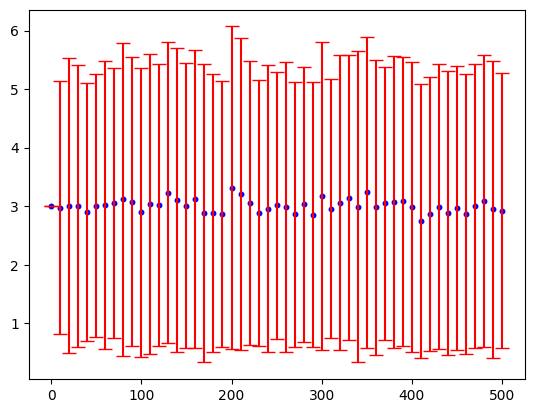

In [ ]:
#chisquare calculation
import math
import numpy as np
import matplotlib.pyplot as plt
from array import array
from numpy.random import default_rng
import timeit
import csv
import pandas as pd
import scipy.stats as stats
from scipy.stats import chisquare
from array import array
start = timeit.default_timer()

#Variables
start_ExpVal=0
end_ExpVal=500
EV_step=10
NoS=500
a = 100 # upper bound
b = 0 # lower bound
cycles=np.floor((end_ExpVal-start_ExpVal)/EV_step+1).astype(int)
running_ExpVal=np.zeros(cycles)
for i in range(cycles):
  running_ExpVal[i]=start_ExpVal+i*EV_step
running_ExpVal=running_ExpVal.astype(int)
memory=np.zeros(shape=(cycles,NoS))
finalchi=np.zeros(cycles)
stnd_dev=np.zeros(cycles)
variance=np.zeros(cycles)
n_2d=np.zeros(shape=(cycles, NoS))

mem_num=0

def longest_path_matrix(R, dmax=None):
    N = n[f]
    if dmax is None:
        dmax = N
    LP = np.zeros((N, N))
    i = 1
    B = R
    while np.sum(B) > 0.:
        path_exist = np.sign(B)
        path_length = i * path_exist
        LP = np.maximum.reduce((LP, path_length))
        B = np.dot(B, R)
        i += 1
        if i == dmax:
            return LP
    return LP

def subinterval_sprinkling(graph_points): # function which returns a set of sprinkled points with edge-points eliminated
  chistat =[]
  for f in range(NoS):
    subExpVal=running_ExpVal[cy]//9
    subN=[[0 for x in range(NoS)] for y in range(9)]
    extray=[0,0,0,100,100,100,200,200,200]
    extrax=[0,100,200,0,100,200,0,100,200]
    colorMap=['yo','mo','co','bo','go','ro','ko']
    for i in range(9):
      rng = np.random.default_rng()
      subN[i]=rng.poisson(subExpVal, NoS)

    sum=np.sum(subN, axis=0)
    n=sum
    n+=2
    memory=np.zeros(shape=(NoS,np.max(n)))
    fcoordy=[[0 for x in range(running_ExpVal[cy])] for y in range(9)]
    fcoordx=[[0 for x in range(running_ExpVal[cy])] for y in range(9)]
    for i in range(9):
      #b=LOWER BOUND a=UPPER BOUND
      fcoordy[i]= (extray[i] + (b-a)* np.random.random_sample((subN[i][f],))+a)
      fcoordx[i]= (extrax[i] + (b-a)* np.random.random_sample((subN[i][f],))+a)
    coordx=[elem for row in fcoordx for elem in row]
    coordy=[elem for row in fcoordy for elem in row]
    if(n[f]):
      rand1=np.random.randint(0, n[f])
      rand2=np.random.randint(0, n[f])
      coordx.append(b)
      coordy.append(b)
      coordx.append(a+extrax[8])
      coordy.append(a+extray[8])
    index = np.argsort(coordx)
    # for i in range(n[f]):
    #   plt.plot(coordx[index[i]],coordy[index[i]], colorMap[(int(np.floor((300-coordx[index[i]])/100)*3+np.floor((300-coordy[index[i]])/100))%7)])
    #   plt.text(coordx[index[i]],coordy[index[i]], i+1)
    # plt.gca().set_aspect('equal', adjustable='box')
    # plt.show()
    coord1x=np.zeros(n[f])   # generate empty x
    coord1y=np.zeros(n[f])   # generate empty y
    coord2x=np.zeros(n[f])   # generate empty x
    coord2y=np.zeros(n[f])   # generate empty y
    coord3x=np.zeros(n[f])   # generate empty x
    coord3y=np.zeros(n[f])   # generate empty y
    coord4x=np.zeros(n[f])   # generate empty x
    coord4y=np.zeros(n[f])   # generate empty y
    coord5x=np.zeros(n[f])   # generate empty x
    coord5y=np.zeros(n[f])   # generate empty y

    count=0
    for i in range(n[f]):
      if (coordy[index[i]] >=0 and coordy[index[i]]<=150 and coordx[index[i]] >=0 and coordx[index[i]]<=150):
        coord1y[count]=coordy[index[i]]   # copy valid x
        coord1x[count]=coordx[index[i]]   # copy valid y
        count=count+1
      elif (coordy[index[i]] >=150 and coordy[index[i]]<=300 and coordx[index[i]] >=150 and coordx[index[i]]<=300):
        coord2y[count]=coordy[index[i]]   # copy valid x
        coord2x[count]=coordx[index[i]]   # copy valid y
        count=count + 1
      elif (coordy[index[i]] >=150 and coordy[index[i]]<=300 and coordx[index[i]] >=0 and coordx[index[i]]<=150):
        coord3y[count]=coordy[index[i]]   # copy valid x
        coord3x[count]=coordx[index[i]]   # copy valid y
        count =count + 1
      elif (coordy[index[i]] >=0 and coordy[index[i]]<=150 and coordx[index[i]] >=150 and coordx[index[i]]<=300):
        coord4y[count]=coordy[index[i]]   # copy valid x
        coord4x[count]=coordx[index[i]]   # copy valid y
        count =count + 1

    coord5x=coord1x+coord2x+coord3x+coord4x
    coord5y=coord1y+coord2y+coord3y+coord4y

    arra=0
    arrb=0
    arrc=0
    arrd=0
    for i in range(n[f]):
      if (coord1x[index[i]] !=0):
        arr=np.array(coord1x[index[i]])
        arra += 1
        # plt.plot(coord1x[index[i]],coord1y[index[i]],'bo')
        # plt.text(coord1x[index[i]],coord1y[index[i]], i+1)
      if (coord2x[index[i]] !=0):
        # plt.plot(coord2x[index[i]],coord2y[index[i]],'mo')
        # plt.text(coord2x[index[i]],coord2y[index[i]], i+1)
        arrb += 1
      if (coord3x[index[i]] !=0):
        # plt.plot(coord3x[index[i]],coord3y[index[i]],'yo')
        # plt.text(coord3x[index[i]],coord3y[index[i]], i+1)
        arrc += 1
      if (coord4x[index[i]] !=0):
        # plt.plot(coord4x[index[i]],coord4y[index[i]],'go')
        # plt.text(coord4x[index[i]],coord4y[index[i]], i+1)
        arrd += 1
    f_obs=arra,arrb,arrc,arrd
    f_obs=np.array(f_obs)
    #print(f_obs)
    stat=chisquare(f_obs)
    stat = np.array(stat)
    #print(stat)
    stat=np.array(stat)
    chistat=np.append(chistat,stat[0])
    pval=1-stats.chi2.cdf(chistat,3)
    # plt.gca().set_aspect('equal', adjustable='box')
    # plt.show()
  return coordx, coordy, index,chistat,pval   # returns x and y coordinates of all valid points & index array & new count
for cy in range(cycles):
  avg=0
  rng = np.random.default_rng()
  n_2d[cy] = rng.poisson(running_ExpVal[cy], NoS)
  n=np.zeros(NoS)
  n=n_2d[cy].astype(int)
  #print(n)
  #print(cy)
  coordx, coordy, index,chistat,pval= subinterval_sprinkling(0)   # call Edge Bias Compensation function, save data
  #print(chistat)
  chistat = np.array(chistat)
  finalchi[cy] = np.average(chistat)
  stnd_dev[cy]=np.std(chistat)
  variance[cy]=np.var(chistat)
print(finalchi)
print("pval",pval)
for i in range(cycles):
  #if(sd_memory[3][i] !=0):
  plt.scatter(running_ExpVal[i], finalchi[i], linewidths=2, c='b', s=5)
  plt.errorbar(running_ExpVal[i], finalchi[i], yerr=stnd_dev[i], fmt=' ', ecolor='r', capsize=5)
  list0 =[" "," "]
  for q in range(np.max(n)):
    list0.append(q)
  list1 = ["Information:", "N"]
  list1.extend(running_ExpVal)
  list2=["Final ExpVal= %d" %(end_ExpVal),"Chistat"]
  list2.extend(finalchi)
  list3=["NoS= %d" %(NoS), "Standard_Dev"]
  list3.extend(stnd_dev)
  list4=["Chisquare calculation", "Variance"]
  list4.extend(variance)
  rows = list(zip(list0, list1, list2, list3, list4))

  wtr = csv.writer(open ('SBI_CHISTAT_FIT_%d_%d.csv'%(end_ExpVal, NoS), 'w'), delimiter=',', lineterminator='\n')

  for row in rows :
      wtr.writerow (row)

stop = timeit.default_timer()
print('Time: ', stop - start)

[471 499 522 468 485 553 469 532 513 474 436 497 510 503 512 512 532 461
 535 514 486 502 526 476 447 504 511 559 488 473 493 484 500 471 499 486
 498 487 473 447 491 485 478 467 505 453 490 518 485 508 527 496 508 503
 484 493 477 508 522 510 508 488 494 480 526 504 491 456 543 470 516 492
 468 502 468 484 530 533 472 506 491 479 495 525 537 512 458 521 480 529
 490 505 474 546 517 522 494 527 514 508]

Total Expected Value:   500


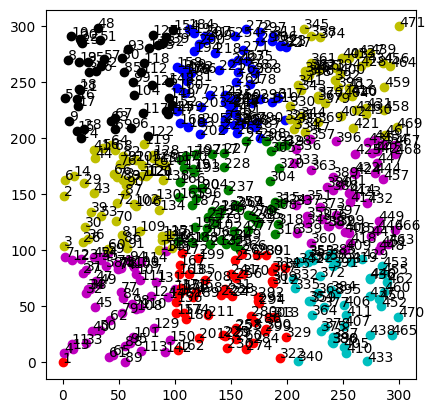

6245856.0
[2.40370371e+03 1.91049553e+03 1.66678735e+03 1.50607918e+03
 1.38678767e+03 1.29229616e+03 1.21430465e+03 1.14807504e+03
 1.09064901e+03 1.04005631e+03 9.94919165e+02 9.54236566e+02
 9.17258513e+02 8.83408664e+02 8.52234640e+02 8.23374901e+02
 7.96535996e+02 7.71476503e+02 7.47995441e+02 7.25923735e+02
 7.05117819e+02 6.85454761e+02 6.66828498e+02 6.49146900e+02
 6.32329432e+02 6.16305298e+02 6.01011933e+02 5.86393781e+02
 5.72401291e+02 5.58990082e+02 5.46120252e+02 5.33755798e+02
 5.21864127e+02 5.10415637e+02 4.99383368e+02 4.88742697e+02
 4.78471072e+02 4.68547796e+02 4.58953823e+02 4.49671591e+02
 4.40684872e+02 4.31978640e+02 4.23538959e+02 4.15352878e+02
 4.07408339e+02 3.99694104e+02 3.92199675e+02 3.84915237e+02
 3.77831597e+02 3.70940134e+02 3.64232752e+02 3.57701841e+02
 3.51340236e+02 3.45141186e+02 3.39098320e+02 3.33205623e+02
 3.27457406e+02 3.21848286e+02 3.16373166e+02 3.11027210e+02
 3.05805830e+02 3.00704668e+02 2.95719583e+02 2.90846633e+02
 2.86082066e+0

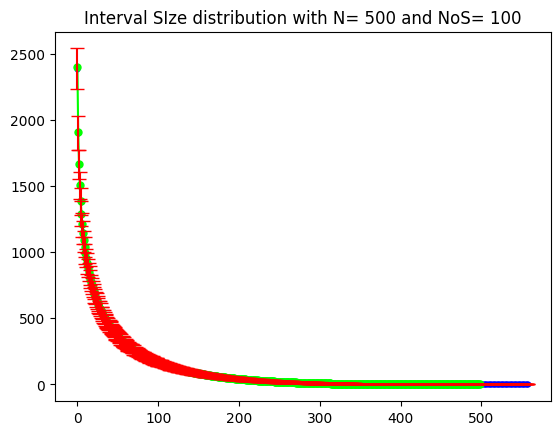

Time:  745.382229994


In [ ]:
#FINAL
#Interval Size Distribution.
#Endpoint: EXCLUDED
#X-axis: Interval Size | Y-axis: avg Interval Size distribution over NoS number of sprinklings, with SD over average Interval Size distribution per sprinkling
# It uses Eq. 20 (specialized to 2D) from Glaser and Surya, Phys Rev D 2013
import math
import numpy as np
import matplotlib.pyplot as plt
from array import array
from numpy.random import default_rng
import timeit
import csv
import pandas as pd
from array import array
from mpmath import mp
start = timeit.default_timer()

#Variables
ExpVal=500
N=ExpVal
NoS=100


counter=np.zeros(NoS)
average=np.zeros(ExpVal)
sub_int = np.zeros(N-1)  # sub_int(i) = <n_i>
rng = np.random.default_rng()
n= rng.poisson(ExpVal, NoS)
counter=np.zeros(NoS)
average=np.zeros(ExpVal)
subN=[[0 for x in range(NoS)] for y in range(9)]
memory=np.zeros(shape=(NoS,np.max(n)))
a = 100 # upper bound
b = 0 # lower bound

mem_num=0
subExpVal=ExpVal/9
extray=[0,0,0,100,100,100,200,200,200]
extrax=[0,100,200,0,100,200,0,100,200]
colorMap=['yo','mo','co','bo','go','ro','ko']
for i in range(9):
  rng = np.random.default_rng()
  subN[i]=rng.poisson(subExpVal, NoS)

sum=np.sum(subN, axis=0)
n=sum
n+=2
memory=np.zeros(shape=(NoS,np.max(n)))
fcoordy=[[0 for x in range(ExpVal)] for y in range(9)]
fcoordx=[[0 for x in range(ExpVal)] for y in range(9)]
def longest_path_matrix(R, dmax=None):
    N = n[f]
    if dmax is None:
        dmax = N
    LP = np.zeros((N, N))
    i = 1
    B = R
    while np.sum(B) > 0.:
        path_exist = np.sign(B)
        path_length = i * path_exist
        LP = np.maximum.reduce((LP, path_length))
        B = np.dot(B, R)
        i += 1
        if i == dmax:
            return LP
    return LP

def subinterval_sprinkling(graph_points): # function which returns a set of sprinkled points with edge-points eliminated
  for i in range(9):
    #b=LOWER BOUND a=UPPER BOUND
    fcoordy[i]= (extray[i] + (b-a)* np.random.random_sample((subN[i][f],))+a)
    fcoordx[i]= (extrax[i] + (b-a)* np.random.random_sample((subN[i][f],))+a)
  coordx=[elem for row in fcoordx for elem in row]
  coordy=[elem for row in fcoordy for elem in row]
  if(n[f]):
    rand1=np.random.randint(0, n[f])
    rand2=np.random.randint(0, n[f])
    coordx.append(b)
    coordy.append(b)
    coordx.append(a+extrax[8])
    coordy.append(a+extray[8])
  #if(sno== 0 and rep== 0 and graph_points!=0):
    #print(fcoordx)
    #print(coordx)
  if(sno== 0 and graph_points!=0):
    print(n)
    print("\nTotal Expected Value:  ", ExpVal)
  index = np.argsort(coordx) # declare index array
  if(sno==0 and graph_points!=0):   # plotting colored causal diamond for visualizing the Edge Bias Compensation (BLUE - Valid points)
   # print("\nRatata")
   # print(index)
    for i in range(n[f]):
      plt.plot(coordx[index[i]],coordy[index[i]], colorMap[(int(np.floor((300-coordx[index[i]])/100)*3+np.floor((300-coordy[index[i]])/100))%7)])
      plt.text(coordx[index[i]],coordy[index[i]], i+1)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()
  return coordx, coordy, index   # returns x and y coordinates of all valid points & index array & new count

for f in range(NoS):
  sno=f  # sno = sprinkling number
  new_n=0
  save_n=n[f]  # used for saving, in memory, the initial value of n[f] generated by the Poisson distribution
  coordx, coordy, index= subinterval_sprinkling(1)   # call Edge Bias Compensation function, save data
  R = [[0 for x in range(n[f])] for y in range(n[f])]
  L = [[0 for x in range(n[f])] for y in range(n[f])]

#    print(index)

    # Calculate Relation Matrix
  for i in range(n[f]):
    for j in range (n[f]):
      R[i][j]=0
      if (coordx[index[i]] > coordx[index[j]] and coordy[index[i]] > coordy[index[j]]):
        R[i][j]=1
      if (coordx[index[j]] > coordx[index[i]] and coordy[index[j]] > coordy[index[i]]):
        R[i][j]=1

  # Calculate Link Matrix
  for i in range(n[f]):
    for j in range (n[f]):
      L[i][j]=0
      if(R[i][j]==0):
        L[i][j]==0
      elif(i>j):
        L[i][j]=1
        for point in range (min(i,j)+1, max(i,j)):
          if(R[i][point]==1 and R[point][j]==1):
            L[i][j]=0

    #Calculate avg and proper time longest path length
  _LP=longest_path_matrix(R, dmax=None)
  _LP_int=_LP.astype(int)
  proper_time=0
  if(f==-1):
#Print LP
    print("  Longest Path :")
    for i in range(n[f]):
      for j in range (n[f]):
        print(" ", _LP[i][j], end= '' )
      print()

# Print relation Matrix
    print("  Relation Matrix :")
    for i in range(n[f]):
        for j in range (n[f]):
            print(" ", R[i][j], end= '' )
        print()

# Print link Matrix
    print("  Link Matrix :")
    for i in range(n[f]):
        for j in range (n[f]):
            print(" ", L[i][j], end= '' )
        print()

  for i in range(n[f]):
    for j in range(i+1, n[f]):
      # if(L[i][j]):
      #   memory[f][0]+=1
      if(R[i][j]):
        active_count=0
        counter[f] +=1
        for point in range(i+1,j):
          if (coordy[index[point]]>coordy[index[i]] and coordy[index[point]]<coordy[index[j]]):
            active_count +=1
        memory[f][active_count] +=1
sum_count=np.sum(counter)
print(sum_count)
average=np.sum(memory, axis=0)/NoS
#print(memory[27])
#print(average)
#print(sum(memory[27]))

stnd_dev=np.std(memory, axis=0)
variance=np.var(memory, axis=0)


# determines <n_i> for sub-intervals of EXCLUSIVE size i
for i in range (0,N-1):
  f1 = N**(i+2) / mp.factorial(i+2)
  f2 = 1 / (i+2)
  f3 = 1 / (i+1)
  sub_int[i] = f1*f2*f3*mp.hyp2f2(i+1,i+1,i+3,i+3,-N)  #sub_int(i) = <n_i>
print(sub_int)
plotted_x = []
plotted_y = []
for i in range(len(sub_int)):
  plotted_x.append(i)
  plotted_y.append(sub_int[i])
plt.plot(plotted_x, plotted_y, marker='o', linestyle='-', color='lime', markersize='5')
plt.title('Interval SIze distribution with N= %d and NoS= %d'%(N, NoS))

yexp = plotted_y
chistat=[]
for i in range(len(yexp)):
  chistat=np.append(chistat,(((average[i]-yexp[i])**2)/yexp[i]))
chistat=np.sum(chistat)
print("chistat", chistat) #chisquare value comparing values to analytical expression

for i in range(np.max(n)):
  #if(sd_memory[3][i] !=0):
  plt.scatter(i, average[i], linewidths=2, c='b', s=5)
  plt.errorbar(i, average[i], yerr=stnd_dev[i], fmt=' ', ecolor='r', capsize=5)
  #plt.yscale('log')
  list1 = ["Information:", "Interval Size"]
  for q in range(np.max(n)):
    list1.append(q)
  list2=["ExpVal= %d" %(ExpVal),"IS freq distribution"]
  list2.extend(average)
  list3=["NoS= %d" %(NoS), "Standard_Dev"]
  list3.extend(stnd_dev)
  list4=["Endpoints Excluded", "Variance"]
  list4.extend(variance)
  list5=["chistat=%.4f"%(chistat), "Analytical Estimation"]
  list5.extend(sub_int)
  rows = list(zip(list1, list2, list5, list3, list4))

  wtr = csv.writer(open ('v2_SBI_ISD_NEW_EP_excluded_%d_%d.csv'%(ExpVal, NoS), 'w'), delimiter=',', lineterminator='\n')

  for row in rows :
      wtr.writerow (row)

plt.show()

stop = timeit.default_timer()
print('Time: ', stop - start)

[399 405 407 402 370 380 415 391 392 420 403 401 423 393 413 359 393 435
 408 416 398 434 416 372 399 380 438 380 412 399 376 410 444 422 393 384
 397 366 404 380 401 429 384 406 385 393 395 403 393 362]

Total Expected Value:   400


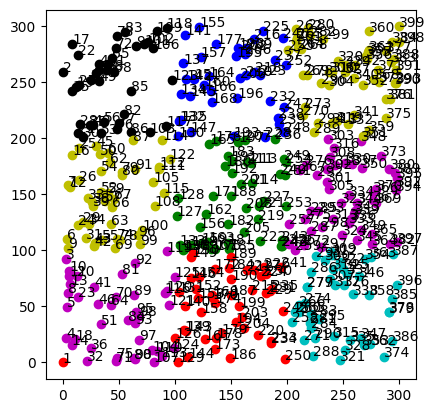

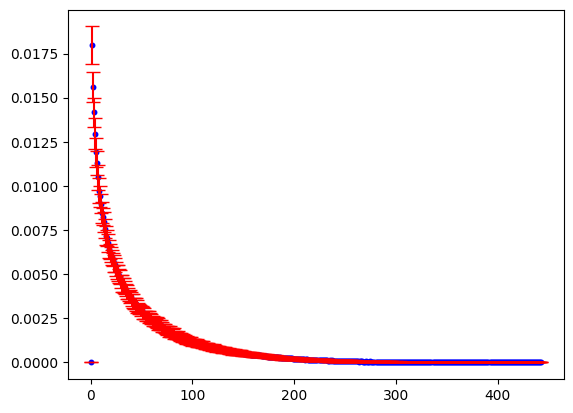

Time:  559.240039458


In [ ]:
#Interval Size Distribution.
#Endpoint: INCLUDED
#X-axis: Interval Size | Y-axis: avg Interval Size distribution over NoS number of sprinklings, with SD over avearge Interval Size distribution per sprinkling
import math
import numpy as np
import matplotlib.pyplot as plt
from array import array
from numpy.random import default_rng
import timeit
import csv
import pandas as pd
from array import array
start = timeit.default_timer()

#Variables
ExpVal=100
NoS=50
rng = np.random.default_rng()
n= rng.poisson(ExpVal, NoS)
counter=np.zeros(NoS)
average=np.zeros(ExpVal)
subN=[[0 for x in range(NoS)] for y in range(9)]

a = 100 # upper bound
b = 0 # lower bound
mem_num=0

mem_num=0
subExpVal=ExpVal/9
extray=[0,0,0,100,100,100,200,200,200]
extrax=[0,100,200,0,100,200,0,100,200]
colorMap=['yo','mo','co','bo','go','ro','ko']
for i in range(9):
  rng = np.random.default_rng()
  subN[i]=rng.poisson(subExpVal, NoS)

sum=np.sum(subN, axis=0)
n=sum
memory=np.zeros(shape=(NoS,np.max(n)))
fcoordy=[[0 for x in range(ExpVal)] for y in range(9)]
fcoordx=[[0 for x in range(ExpVal)] for y in range(9)]
def longest_path_matrix(R, dmax=None):
    N = n[f]
    if dmax is None:
        dmax = N
    LP = np.zeros((N, N))
    i = 1
    B = R
    while np.sum(B) > 0.:
        path_exist = np.sign(B)
        path_length = i * path_exist
        LP = np.maximum.reduce((LP, path_length))
        B = np.dot(B, R)
        i += 1
        if i == dmax:
            return LP
    return LP

def subinterval_sprinkling(graph_points): # function which returns a set of sprinkled points with edge-points eliminated
  for i in range(9):
    #b=LOWER BOUND a=UPPER BOUND
    fcoordy[i]= (extray[i] + (b-a)* np.random.random_sample((subN[i][f],))+a)
    fcoordx[i]= (extrax[i] + (b-a)* np.random.random_sample((subN[i][f],))+a)
  coordx=[elem for row in fcoordx for elem in row]
  coordy=[elem for row in fcoordy for elem in row]
  if(n[f]):
    rand1=np.random.randint(0, n[f])
    rand2=np.random.randint(0, n[f])
    coordx[rand1]=b
    coordy[rand1]=b
    coordx[rand2]=a+extrax[8]
    coordy[rand2]=a+extray[8]
  #if(sno== 0 and rep== 0 and graph_points!=0):
    #print(fcoordx)
    #print(coordx)
  if(sno== 0 and graph_points!=0):
    print(n)
    print("\nTotal Expected Value:  ", ExpVal)
  index = np.argsort(coordx) # declare index array
  if(sno==0 and graph_points!=0):   # plotting colored causal diamond for visualizing the Edge Bias Compensation (BLUE - Valid points)
   # print("\nRatata")
   # print(index)
    for i in range(n[f]):
      plt.plot(coordx[index[i]],coordy[index[i]], colorMap[(int(np.floor((300-coordx[index[i]])/100)*3+np.floor((300-coordy[index[i]])/100))%7)])
      plt.text(coordx[index[i]],coordy[index[i]], i+1)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()
  return coordx, coordy, index   # returns x and y coordinates of all valid points & index array & new count

for f in range(NoS):
  sno=f  # sno = sprinkling number
  new_n=0
  save_n=n[f]  # used for saving, in memory, the initial value of n[f] generated by the Poisson distribution
  coordx, coordy, index= subinterval_sprinkling(1)   # call Edge Bias Compensation function, save data
  R = [[0 for x in range(n[f])] for y in range(n[f])]
  L = [[0 for x in range(n[f])] for y in range(n[f])]
  # Random coordinates [b,a) uniform distributed
  coordy = (b-a)* np.random.random_sample((n[f],))+a # generate random y
  coordx = (b-a)* np.random.random_sample((n[f],))+a # generate random x
  index = np.argsort(coordx) # declare index array
#    print(index)

    # Calculate Relation Matrix
  for i in range(n[f]):
    for j in range (n[f]):
      R[i][j]=0
      if (coordx[index[i]] > coordx[index[j]] and coordy[index[i]] > coordy[index[j]]):
        R[i][j]=1

  # Calculate Link Matrix
  for i in range(n[f]):
    for j in range (n[f]):
      L[i][j]=0
      if(R[i][j]==0):
        L[i][j]==0
      elif(i>j):
        L[i][j]=1
        for point in range (min(i,j)+1, max(i,j)):
          if(R[i][point]==1 and R[point][j]==1):
            L[i][j]=0

    #Calculate avg and proper time longest path length
  _LP=longest_path_matrix(R, dmax=None)
  _LP_int=_LP.astype(int)
  proper_time=0
  for i in range(n[f]):
    for j in range(n[f]):
      if(_LP_int[i][j] != 0):
        active_count=0
        counter[f] +=1
        for point in range(index[j]+1, index[i]):
          if (coordy[index[point]]>coordy[index[j]] and coordy[index[point]]<coordy[index[i]]):
            active_count +=1
        if(active_count >0):
          memory[f][active_count] +=1

sum_count=np.sum(counter)
average=np.sum(memory, axis=0)/sum_count
for f in range(NoS):
  memory[f]=memory[f]/counter[f]

#print(memory[27])
#print(average)
#print(sum(memory[27]))

stnd_dev=np.std(memory, axis=0)
variance=np.var(memory, axis=0)

for i in range(np.max(n)):
  #if(sd_memory[3][i] !=0):
  plt.scatter(i, average[i], linewidths=2, c='b', s=5)
  plt.errorbar(i, average[i], yerr=stnd_dev[i], fmt=' ', ecolor='r', capsize=5)
 # plt.yscale('log')
  list1 = ["Information:", "Interval Size"]
  for q in range(np.max(n)):
    list1.append(q)
  list2=["ExpVal= %d" %(ExpVal),"IS freq distribution"]
  list2.extend(average)
  list3=["NoS= %d" %(NoS), "Standard_Dev"]
  list3.extend(stnd_dev)
  list4=["Endpoints Included", "Variance"]
  list4.extend(variance)
  rows = list(zip(list1, list2, list3, list4))

  wtr = csv.writer(open ('SBI_ISD_EP_included_%d_%d.csv'%(ExpVal, NoS), 'w'), delimiter=',', lineterminator='\n')

  for row in rows :
      wtr.writerow (row)

plt.show()

stop = timeit.default_timer()
print('Time: ', stop - start)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2]

Total Expected Value:   0


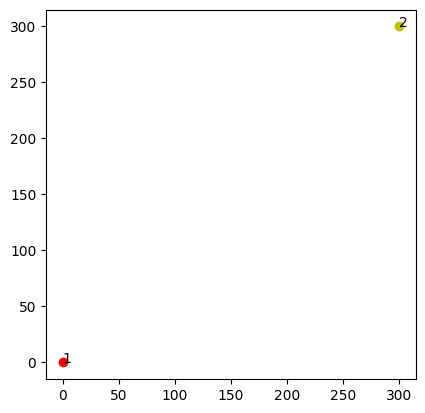

DONE 0 / 21 @@@@@@@@@@@@@@@@@@@@
[29 27 32 31 22 27 21 26 18 25 16 32 21 21 28 33 29 40 28 32 34 19 29 33
 22 27 27 22 32 25 30 30 29 26 31 33 32 35 31 25 35 19 31 27 32 34 22 19
 19 26]
[29 27 32 31 22 27 21 26 18 25 16 32 21 21 28 33 29 40 28 32 34 19 29 33
 22 27 27 22 32 25 30 30 29 26 31 33 32 35 31 25 35 19 31 27 32 34 22 19
 19 26]

Total Expected Value:   25


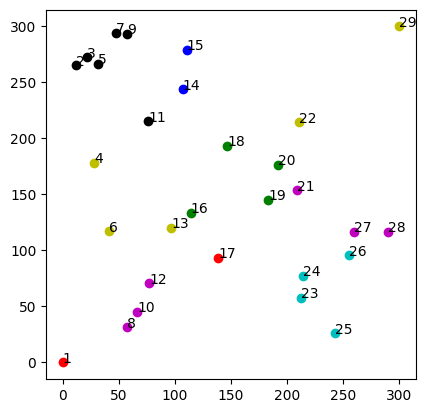

DONE 1 / 21 @@@@@@@@@@@@@@@@@@@@
[56 51 53 47 46 63 55 57 65 45 51 64 41 59 49 48 66 67 49 50 43 42 39 39
 48 54 53 53 59 56 43 43 57 46 38 44 50 64 48 50 50 62 46 47 64 65 51 44
 40 49]
[56 51 53 47 46 63 55 57 65 45 51 64 41 59 49 48 66 67 49 50 43 42 39 39
 48 54 53 53 59 56 43 43 57 46 38 44 50 64 48 50 50 62 46 47 64 65 51 44
 40 49]

Total Expected Value:   50


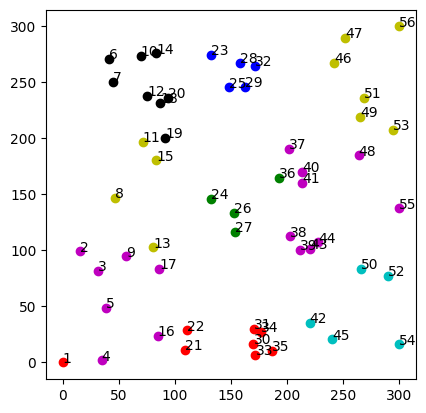

DONE 2 / 21 @@@@@@@@@@@@@@@@@@@@
[ 83  72  74  76  78  77  67  78  68  72  72  75  87  78  66  53  85  74
  73  83  73  67  81  68  74  75  87  61  76  76  78  82  72  73  70  56
  82  90  69  71  84  72  75  85  81  88 105  69  70  84]
[ 83  72  74  76  78  77  67  78  68  72  72  75  87  78  66  53  85  74
  73  83  73  67  81  68  74  75  87  61  76  76  78  82  72  73  70  56
  82  90  69  71  84  72  75  85  81  88 105  69  70  84]

Total Expected Value:   75


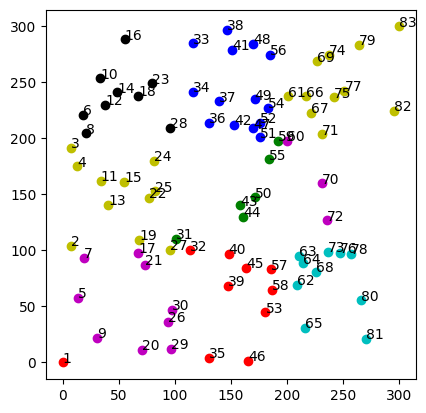

DONE 3 / 21 @@@@@@@@@@@@@@@@@@@@
[ 96 107 105 110  85 110  88 102 105  96  88  90 102  97 106  90 110 104
 103 100 104 114 102 106  96  94 105  93 103 114 100  92 116 114 117  99
 108  91 102 125 119 102 108  99  97  91 100 103 102  92]
[ 96 107 105 110  85 110  88 102 105  96  88  90 102  97 106  90 110 104
 103 100 104 114 102 106  96  94 105  93 103 114 100  92 116 114 117  99
 108  91 102 125 119 102 108  99  97  91 100 103 102  92]

Total Expected Value:   100


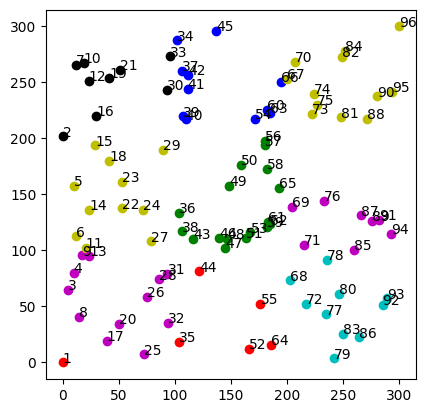

DONE 4 / 21 @@@@@@@@@@@@@@@@@@@@
[131 136 127 136 131 132 120 121 124 124 126 134 112 126 129 123 108 139
 131 132 121 137 124 134 133 110 131 132 120 132 114 133 110 142 133 120
 125 122 123 128 119 127 127 125 110 121 108 121 122 133]
[131 136 127 136 131 132 120 121 124 124 126 134 112 126 129 123 108 139
 131 132 121 137 124 134 133 110 131 132 120 132 114 133 110 142 133 120
 125 122 123 128 119 127 127 125 110 121 108 121 122 133]

Total Expected Value:   125


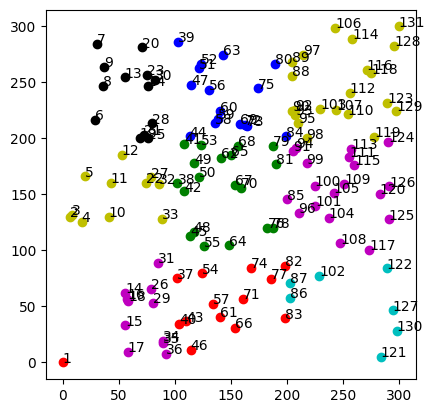

DONE 5 / 21 @@@@@@@@@@@@@@@@@@@@
[146 152 157 134 134 147 148 162 152 142 150 145 125 146 157 153 168 158
 142 152 141 143 152 144 135 143 156 148 142 150 162 155 166 179 171 161
 139 149 149 153 144 145 158 186 168 146 138 148 161 152]
[146 152 157 134 134 147 148 162 152 142 150 145 125 146 157 153 168 158
 142 152 141 143 152 144 135 143 156 148 142 150 162 155 166 179 171 161
 139 149 149 153 144 145 158 186 168 146 138 148 161 152]

Total Expected Value:   150


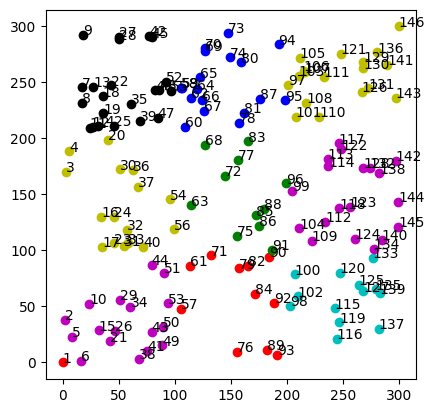

DONE 6 / 21 @@@@@@@@@@@@@@@@@@@@
[177 187 166 176 194 188 166 177 198 157 166 162 161 172 178 153 187 174
 157 183 193 180 183 175 194 180 197 178 183 152 197 194 164 198 185 189
 171 160 189 173 199 172 198 171 172 198 182 174 165 183]
[177 187 166 176 194 188 166 177 198 157 166 162 161 172 178 153 187 174
 157 183 193 180 183 175 194 180 197 178 183 152 197 194 164 198 185 189
 171 160 189 173 199 172 198 171 172 198 182 174 165 183]

Total Expected Value:   175


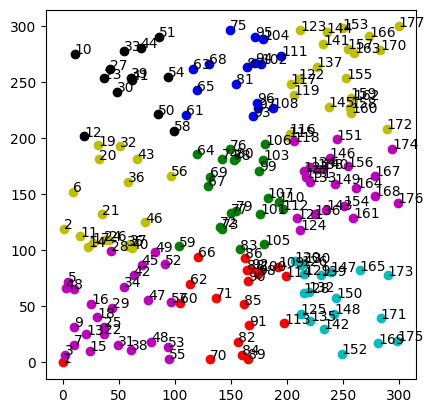

DONE 7 / 21 @@@@@@@@@@@@@@@@@@@@
[200 185 252 190 197 218 219 206 195 200 193 192 210 214 207 201 187 201
 208 195 205 210 216 209 173 190 179 215 208 205 183 217 216 190 205 197
 205 223 212 203 212 208 223 178 170 193 208 202 203 188]
[200 185 252 190 197 218 219 206 195 200 193 192 210 214 207 201 187 201
 208 195 205 210 216 209 173 190 179 215 208 205 183 217 216 190 205 197
 205 223 212 203 212 208 223 178 170 193 208 202 203 188]

Total Expected Value:   200


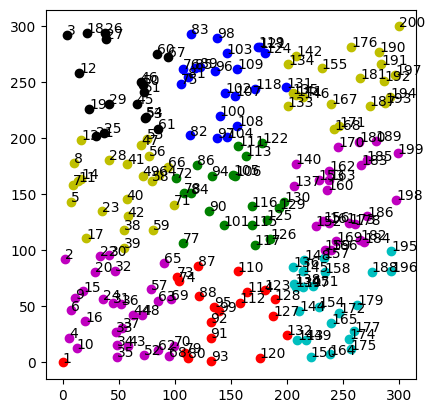

DONE 8 / 21 @@@@@@@@@@@@@@@@@@@@
[219 235 231 233 200 217 218 251 230 209 224 221 226 233 236 236 229 215
 234 204 201 219 251 222 224 216 217 195 183 227 217 219 214 221 208 231
 207 205 234 248 235 209 210 194 268 231 236 244 197 246]
[219 235 231 233 200 217 218 251 230 209 224 221 226 233 236 236 229 215
 234 204 201 219 251 222 224 216 217 195 183 227 217 219 214 221 208 231
 207 205 234 248 235 209 210 194 268 231 236 244 197 246]

Total Expected Value:   225


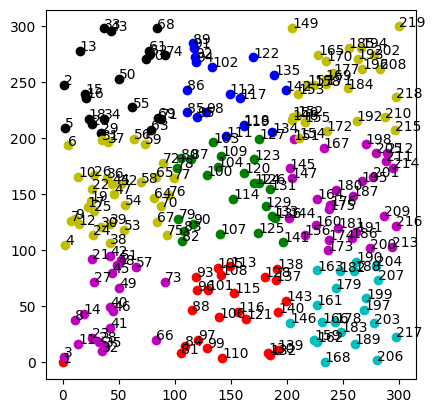

DONE 9 / 21 @@@@@@@@@@@@@@@@@@@@
[259 260 256 242 267 259 255 257 243 235 267 250 291 260 266 256 275 253
 253 248 263 242 255 245 238 277 229 249 241 228 247 276 240 278 254 259
 261 280 234 256 291 251 239 259 246 249 219 247 253 268]
[259 260 256 242 267 259 255 257 243 235 267 250 291 260 266 256 275 253
 253 248 263 242 255 245 238 277 229 249 241 228 247 276 240 278 254 259
 261 280 234 256 291 251 239 259 246 249 219 247 253 268]

Total Expected Value:   250


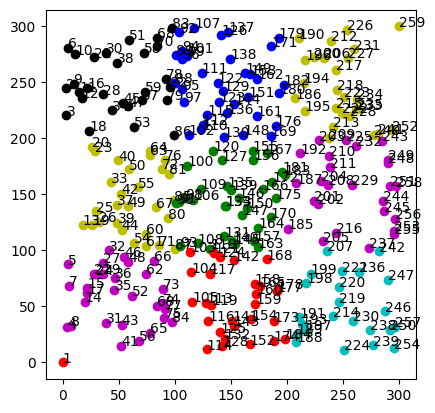

DONE 10 / 21 @@@@@@@@@@@@@@@@@@@@
[282 282 291 278 258 273 310 291 274 281 249 283 284 265 287 291 294 270
 292 292 245 260 277 301 285 283 266 261 256 284 286 290 281 281 307 295
 291 278 263 285 283 272 319 277 277 300 293 292 297 254]
[282 282 291 278 258 273 310 291 274 281 249 283 284 265 287 291 294 270
 292 292 245 260 277 301 285 283 266 261 256 284 286 290 281 281 307 295
 291 278 263 285 283 272 319 277 277 300 293 292 297 254]

Total Expected Value:   275


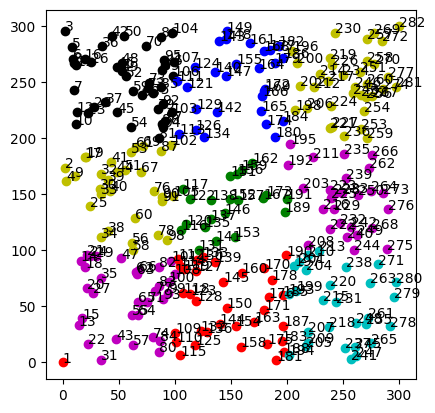

DONE 11 / 21 @@@@@@@@@@@@@@@@@@@@
[284 298 321 294 299 296 295 316 311 322 344 286 311 302 327 318 308 300
 289 307 312 306 280 297 288 311 281 313 296 288 315 286 286 313 305 297
 321 273 293 276 316 289 287 314 314 302 324 322 321 318]
[284 298 321 294 299 296 295 316 311 322 344 286 311 302 327 318 308 300
 289 307 312 306 280 297 288 311 281 313 296 288 315 286 286 313 305 297
 321 273 293 276 316 289 287 314 314 302 324 322 321 318]

Total Expected Value:   300


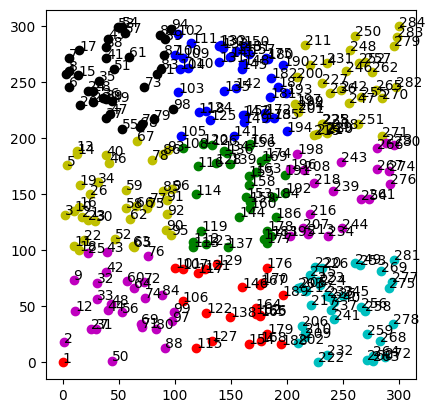

DONE 12 / 21 @@@@@@@@@@@@@@@@@@@@
[306 337 337 339 349 337 348 357 338 364 320 339 349 359 344 350 329 320
 315 292 303 307 336 368 348 361 354 320 322 322 334 344 357 328 305 302
 314 335 325 342 358 313 354 339 311 317 314 284 312 334]
[306 337 337 339 349 337 348 357 338 364 320 339 349 359 344 350 329 320
 315 292 303 307 336 368 348 361 354 320 322 322 334 344 357 328 305 302
 314 335 325 342 358 313 354 339 311 317 314 284 312 334]

Total Expected Value:   325


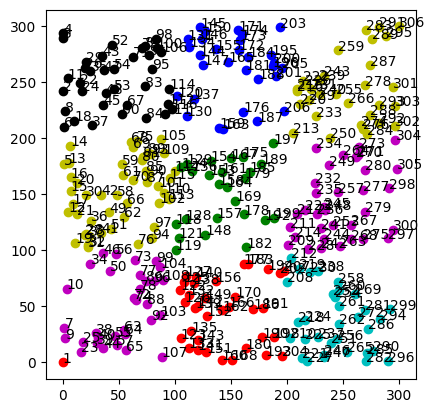

DONE 13 / 21 @@@@@@@@@@@@@@@@@@@@
[345 387 348 357 331 352 354 336 345 344 395 329 342 380 350 398 361 337
 348 345 371 331 380 348 359 351 393 354 376 361 366 334 346 395 358 357
 359 363 347 350 302 360 372 331 348 343 364 343 359 371]
[345 387 348 357 331 352 354 336 345 344 395 329 342 380 350 398 361 337
 348 345 371 331 380 348 359 351 393 354 376 361 366 334 346 395 358 357
 359 363 347 350 302 360 372 331 348 343 364 343 359 371]

Total Expected Value:   350


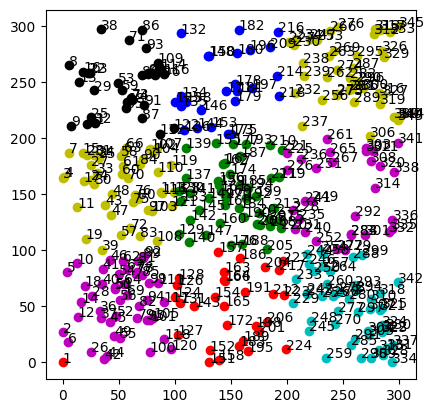

DONE 14 / 21 @@@@@@@@@@@@@@@@@@@@
[392 357 375 360 359 395 394 367 386 373 346 376 383 397 349 347 370 356
 394 377 380 368 362 387 344 396 366 374 375 371 368 372 374 421 359 379
 382 386 372 344 375 377 392 358 376 369 391 399 344 371]
[392 357 375 360 359 395 394 367 386 373 346 376 383 397 349 347 370 356
 394 377 380 368 362 387 344 396 366 374 375 371 368 372 374 421 359 379
 382 386 372 344 375 377 392 358 376 369 391 399 344 371]

Total Expected Value:   375


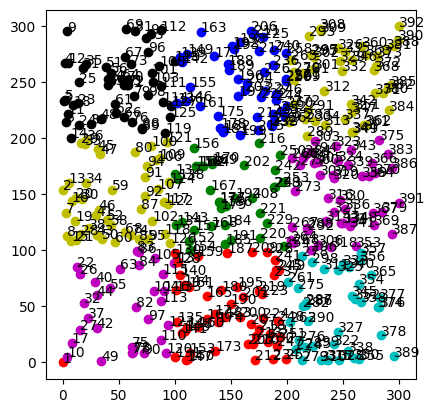

DONE 15 / 21 @@@@@@@@@@@@@@@@@@@@
[417 380 386 411 392 391 418 438 409 394 385 455 380 449 386 413 403 369
 428 394 395 397 431 402 388 412 378 383 433 401 403 393 396 393 408 421
 388 417 417 424 423 403 379 403 412 408 420 391 395 420]
[417 380 386 411 392 391 418 438 409 394 385 455 380 449 386 413 403 369
 428 394 395 397 431 402 388 412 378 383 433 401 403 393 396 393 408 421
 388 417 417 424 423 403 379 403 412 408 420 391 395 420]

Total Expected Value:   400


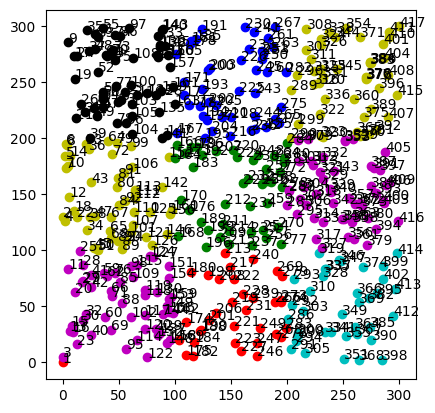

DONE 16 / 21 @@@@@@@@@@@@@@@@@@@@
[394 430 434 402 404 424 389 451 389 476 443 425 444 477 442 441 457 411
 429 398 429 421 419 450 432 435 432 407 455 441 448 416 393 444 410 417
 397 413 389 425 420 437 413 426 467 433 408 406 431 454]
[394 430 434 402 404 424 389 451 389 476 443 425 444 477 442 441 457 411
 429 398 429 421 419 450 432 435 432 407 455 441 448 416 393 444 410 417
 397 413 389 425 420 437 413 426 467 433 408 406 431 454]

Total Expected Value:   425


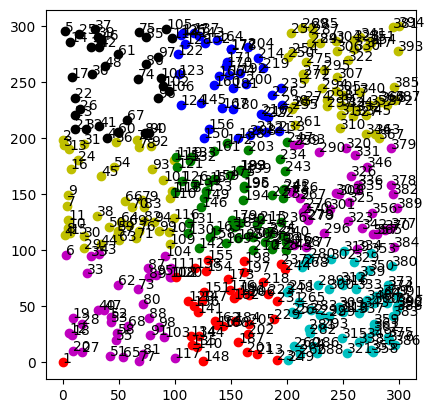

DONE 17 / 21 @@@@@@@@@@@@@@@@@@@@
[427 494 464 459 478 442 469 442 445 468 446 446 427 448 460 430 426 486
 466 442 464 434 436 440 434 421 442 478 484 462 480 458 436 454 421 484
 499 421 496 468 432 420 497 463 446 471 451 438 439 416]
[427 494 464 459 478 442 469 442 445 468 446 446 427 448 460 430 426 486
 466 442 464 434 436 440 434 421 442 478 484 462 480 458 436 454 421 484
 499 421 496 468 432 420 497 463 446 471 451 438 439 416]

Total Expected Value:   450


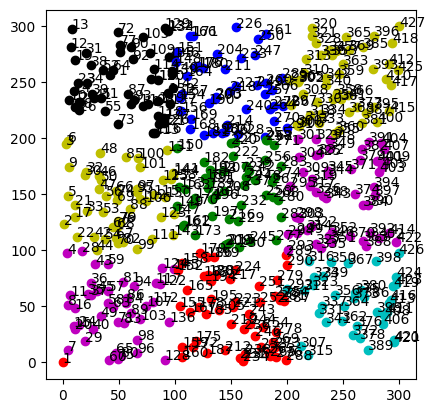

DONE 18 / 21 @@@@@@@@@@@@@@@@@@@@
[464 458 472 485 435 485 463 443 445 489 474 482 468 506 449 443 494 501
 440 480 462 498 490 483 477 447 465 473 466 456 507 447 442 508 468 506
 468 461 503 492 484 458 439 506 473 493 468 458 448 484]
[464 458 472 485 435 485 463 443 445 489 474 482 468 506 449 443 494 501
 440 480 462 498 490 483 477 447 465 473 466 456 507 447 442 508 468 506
 468 461 503 492 484 458 439 506 473 493 468 458 448 484]

Total Expected Value:   475


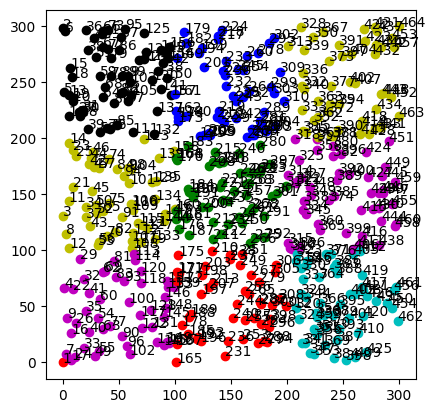

DONE 19 / 21 @@@@@@@@@@@@@@@@@@@@
[497 497 505 528 503 528 480 505 515 519 492 451 450 517 488 506 497 504
 480 481 495 482 524 498 499 470 490 493 486 503 501 525 520 494 501 545
 486 513 510 495 496 502 493 487 513 481 435 482 543 529]
[497 497 505 528 503 528 480 505 515 519 492 451 450 517 488 506 497 504
 480 481 495 482 524 498 499 470 490 493 486 503 501 525 520 494 501 545
 486 513 510 495 496 502 493 487 513 481 435 482 543 529]

Total Expected Value:   500


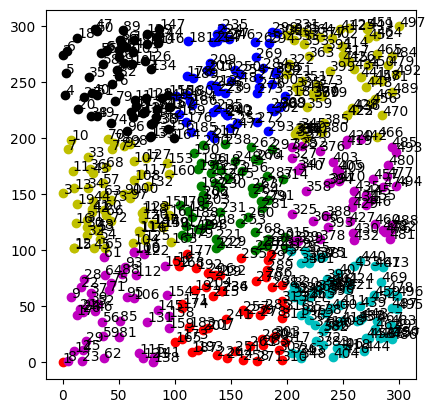

DONE 20 / 21 @@@@@@@@@@@@@@@@@@@@
[13. 12. 14. 12.  9. 12. 12. 12. 13. 14. 11. 16. 11. 14. 11. 12. 12. 13.
 12. 10. 12. 10. 10.  9. 11. 11. 13. 12. 11. 12. 13. 11. 12. 10.  9. 12.
 12. 10. 10. 12. 12. 14. 10.  9. 13. 11. 12. 11. 10. 11.]
11.6
580.0
[ 8.78 11.6  15.08 17.74 20.32 21.64 24.44 24.88 26.58 28.82 30.3  31.44
 33.34 34.16 35.   36.96 37.38 38.96 40.28 41.18] [ 8.2335063  12.04140874 14.99567162 17.50180065 19.71915557 21.73018537
 23.58417586 25.3133948  26.94034316 28.48145722 29.94917973 31.35320091
 32.70124342 33.99958076 35.2533921  36.4670126  37.64411451 38.78784118
 39.90090807 40.98568019]
chistat 0.1553822131872513


<ipython-input-3-59993e888f33>:142: RuntimeWarning: divide by zero encountered in power
  f=2- 0.79*x**(-0.25)
<ipython-input-3-59993e888f33>:143: RuntimeWarning: invalid value encountered in multiply
  y=np.sqrt(x)*f
<ipython-input-3-59993e888f33>:146: RuntimeWarning: divide by zero encountered in power
  fnew=2-0.79*running_ExpVal**(-0.25)
<ipython-input-3-59993e888f33>:148: RuntimeWarning: invalid value encountered in multiply
  yexp=yexp*fnew
<ipython-input-3-59993e888f33>:167: RuntimeWarning: divide by zero encountered in power
  analytical_val[i]=(2- 0.79*x**(-0.25))*np.sqrt(x)
<ipython-input-3-59993e888f33>:167: RuntimeWarning: invalid value encountered in double_scalars
  analytical_val[i]=(2- 0.79*x**(-0.25))*np.sqrt(x)


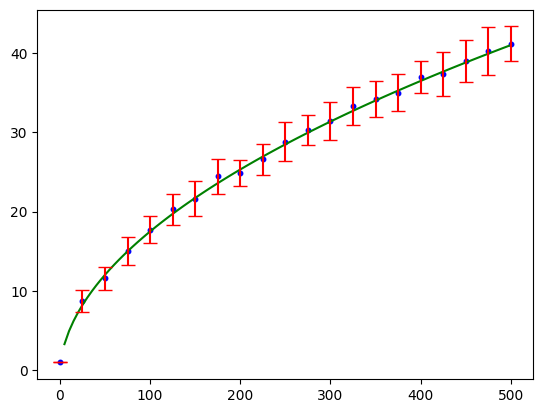

Time:  3417.299815719


In [ ]:
#Longest Path length Distribution
#Endpoints: EXCLUDED
#X-axis: ExpVal | Y-axis: avg ProperTime(Longest Path Length) over NoS number of sprinklings
import math
import numpy as np
import matplotlib.pyplot as plt
from array import array
from numpy.random import default_rng
import timeit
import csv
import pandas as pd
from array import array
start = timeit.default_timer()

#Variables
start_ExpVal=0
end_ExpVal=500
EV_step=25
NoS=50
a = 100 # upper bound
b = 0 # lower bound
extray=[0,0,0,100,100,100,200,200,200]
extrax=[0,100,200,0,100,200,0,100,200]
colorMap=['yo','mo','co','bo','go','ro','ko']
cycles=np.floor((end_ExpVal-start_ExpVal)/EV_step+1).astype(int)
running_ExpVal=np.zeros(cycles)
fcoordy=[[0 for x in range(end_ExpVal)] for y in range(9)]
fcoordx=[[0 for x in range(end_ExpVal)] for y in range(9)]
subN=[[0 for x in range(NoS)] for y in range(9)]
for i in range(cycles):
  running_ExpVal[i]=start_ExpVal+i*EV_step
running_ExpVal=running_ExpVal.astype(int)
memory=np.zeros(shape=(cycles,NoS))
average=np.zeros(cycles)
n_2d=np.zeros(shape=(cycles, NoS))
def longest_path_matrix(R, dmax=None):
    N = n[f]
    if dmax is None:
        dmax = N
    LP = np.zeros((N, N))
    i = 1
    B = R
    while np.sum(B) > 0.:
        path_exist = np.sign(B)
        path_length = i * path_exist
        LP = np.maximum.reduce((LP, path_length))
        B = np.dot(B, R)
        i += 1
        if i == dmax:
            return LP
    return LP

def subinterval_sprinkling(graph_points): # function which returns a set of sprinkled points with edge-points eliminated
  for i in range(9):
    #b=LOWER BOUND a=UPPER BOUND
    fcoordy[i]= (extray[i] + (b-a)* np.random.random_sample((subN[i][f],))+a)
    fcoordx[i]= (extrax[i] + (b-a)* np.random.random_sample((subN[i][f],))+a)

  coordx=[elem for row in fcoordx for elem in row]
  coordy=[elem for row in fcoordy for elem in row]
  if(n[f]):
    rand1=np.random.randint(0, n[f])
    rand2=np.random.randint(0, n[f])
    coordx.append(b)
    coordy.append(b)
    coordx.append(a+extrax[8])
    coordy.append(a+extray[8])
  #if(sno== 0 and rep== 0 and graph_points!=0):
    #print(fcoordx)
    #print(coordx)
  if(f== 0 and graph_points!=0):
    print(n)
    print("\nTotal Expected Value:  ", running_ExpVal[cy])
  index = np.argsort(coordx) # declare index array
  if(f==0 and graph_points!=0):   # plotting colored causal diamond for visualizing the Edge Bias Compensation (BLUE - Valid points)
   # print("\nRatata")
   # print(index)
    for i in range(n[f]):
      plt.plot(coordx[index[i]],coordy[index[i]], colorMap[(int(np.floor((300-coordx[index[i]])/100)*3+np.floor((300-coordy[index[i]])/100))%7)])
      plt.text(coordx[index[i]],coordy[index[i]], i+1)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()
  return coordx, coordy, index   # returns x and y coordinates of all valid points & index array & new count


for cy in range(cycles):
  avg=0
  subExpVal=running_ExpVal[cy]/9
  for i in range(9):
    rng = np.random.default_rng()
    subN[i]=rng.poisson(subExpVal, NoS)
  sum=np.sum(subN, axis=0)
  n=sum
  n+=2
  rng = np.random.default_rng()
  n_2d[cy] = n
  print(n)
  for f in range(NoS):
    coordx, coordy, index= subinterval_sprinkling(1)   # call Edge Bias Compensation function, save data
    R = [[0 for x in range(n[f])] for y in range(n[f])]
    L = [[0 for x in range(n[f])] for y in range(n[f])]

  #    print(index)

      # Calculate Relation Matrix
    for i in range(n[f]):
      for j in range (n[f]):
        R[i][j]=0
        if (coordx[index[i]] > coordx[index[j]] and coordy[index[i]] > coordy[index[j]]):
          R[i][j]=1

    # Calculate Link Matrix
    for i in range(n[f]):
      for j in range (n[f]):
        L[i][j]=0
        if(R[i][j]==0):
          L[i][j]==0
        elif(i>j):
          L[i][j]=1
          for point in range (min(i,j)+1, max(i,j)):
            if(R[i][point]==1 and R[point][j]==1):
              L[i][j]=0

      #Calculate avg and proper time longest path length
    _LP=longest_path_matrix(R, dmax=None)
    _LP_int=_LP.astype(int)
    proper_time=0
    for i in range(n[f]):
      for j in range(n[f]):
        if(_LP_int[i][j] > proper_time):
          proper_time=_LP_int[i][j]
    memory[cy][f] = proper_time
  average[cy]=np.sum(memory[cy])/NoS
  print("DONE %d / %d @@@@@@@@@@@@@@@@@@@@"%(cy, cycles))
print(memory[2])
print(average[2])
print(np.sum(memory[2]))

stnd_dev=np.std(memory, axis=1)
variance=np.var(memory, axis=1)

x=np.linspace(start_ExpVal, end_ExpVal, 100)
f=2- 0.79*x**(-0.25)
y=np.sqrt(x)*f
running_ExpVal=np.array(running_ExpVal)
# print(running_ExpVal)
fnew=2-0.79*running_ExpVal**(-0.25)
yexp=np.sqrt(running_ExpVal)
yexp=yexp*fnew
yexp=np.delete(yexp,0)
averagenew=np.delete(average,0)
print(averagenew,yexp)
# chistat=stats.chisquare(averagenew,yexp)
chistat=[]
for i in range(len(averagenew)):
  chistat=np.append(chistat,(((averagenew[i]-yexp[i])**2)/yexp[i]))
chistat=np.sum(chistat)
print("chistat", chistat) #chisquare value comparing values to analytical expression

#np.sqrt(x/5000)
#y=np.sqrt(np.pi)/(2*gamma(1/2))*x**2
plt.plot(x,y, 'g')


analytical_val=np.zeros(cycles)
for i in range(cycles):
  x=running_ExpVal[i]
  analytical_val[i]=(2- 0.79*x**(-0.25))*np.sqrt(x)
for i in range(cycles):
  x=running_ExpVal[i]
  #if(sd_memory[3][i] !=0):
  plt.scatter(running_ExpVal[i], average[i], linewidths=2, c='b', s=5)
  plt.errorbar(running_ExpVal[i], average[i], yerr=stnd_dev[i], fmt=' ', ecolor='r', capsize=5)
  list0 =["chistat=%.4f"%(chistat)," "]
  for q in range(np.max(n)):
    list0.append(q)
  list1 = ["Information:", "Expected Value"]
  list1.extend(running_ExpVal)
  list2=["Final ExpVal= %d" %(end_ExpVal),"Longest Path Length"]
  list2.extend(average)
  list3=["NoS= %d" %(NoS), "Standard_Dev"]
  list3.extend(stnd_dev)
  list4=["Endpoints Excluded", "Variance"]
  list4.extend(variance)
  list5=["Initial ExpVal= %d" %(start_ExpVal), "Analytical Estimation"]
  list5.extend(analytical_val)
  rows = list(zip(list0, list1, list5, list2, list3, list4))

  wtr = csv.writer(open ('BOX_LPD_EP_excluded_%d_%d.csv'%(end_ExpVal, NoS), 'w'), delimiter=',', lineterminator='\n')

  for row in rows :
      wtr.writerow (row)
plt.show()
stop = timeit.default_timer()
print('Time: ', stop - start)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Total Expected Value:   0


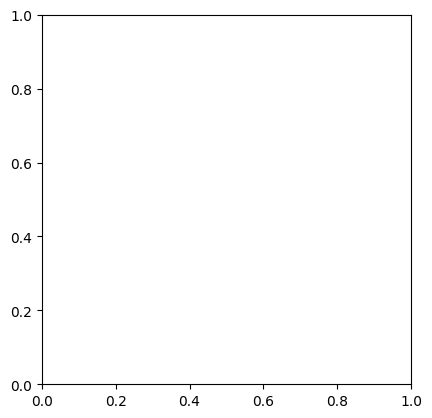

[51 47 58 48 49 56 56 55 41 42 39 46 42 31 53 52 49 56 45 40 54 49 49 47
 55 49 55 46 57 56 49 51 49 47 47 43 51 43 50 39 53 56 46 53 50 44 57 49
 45 60 45 60 42 52 58 65 45 45 55 47 51 52 38 53 48 46 46 36 50 52 60 56
 52 56 42 40 56 44 47 56 60 50 54 54 47 58 50 46 59 51 31 48 43 46 47 39
 53 63 51 52]
[51 47 58 48 49 56 56 55 41 42 39 46 42 31 53 52 49 56 45 40 54 49 49 47
 55 49 55 46 57 56 49 51 49 47 47 43 51 43 50 39 53 56 46 53 50 44 57 49
 45 60 45 60 42 52 58 65 45 45 55 47 51 52 38 53 48 46 46 36 50 52 60 56
 52 56 42 40 56 44 47 56 60 50 54 54 47 58 50 46 59 51 31 48 43 46 47 39
 53 63 51 52]

Total Expected Value:   50


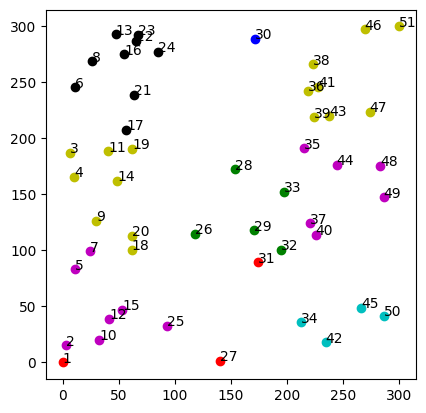

[123  94 120 102 105 116  98 101 103 103  93 101 100  89  83 116 105  77
 104 104  92 100 104  95  85  98  81  89  97  80 100  97  83 111 119  99
 106  89 101  92 107 109  87 100 115  95  92  92 102  88  97  82 100  99
 111  93 117 103  85 107 105  90 105  94 124  98 111  88  94  93 105 103
  97  92  96 104  97 101  94  81  97  95  75  98  94 102 110  92  91  87
 102 104  94  75  96  94 116 102 105  78]
[123  94 120 102 105 116  98 101 103 103  93 101 100  89  83 116 105  77
 104 104  92 100 104  95  85  98  81  89  97  80 100  97  83 111 119  99
 106  89 101  92 107 109  87 100 115  95  92  92 102  88  97  82 100  99
 111  93 117 103  85 107 105  90 105  94 124  98 111  88  94  93 105 103
  97  92  96 104  97 101  94  81  97  95  75  98  94 102 110  92  91  87
 102 104  94  75  96  94 116 102 105  78]

Total Expected Value:   100


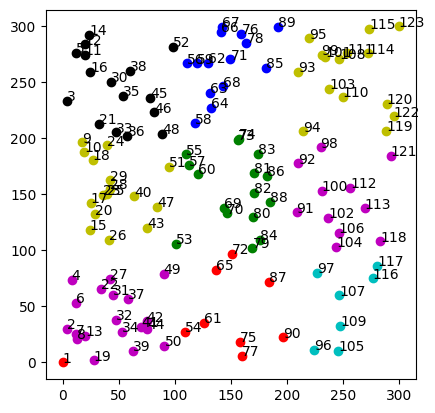

[133 157 134 120 145 154 138 157 150 144 156 126 164 163 152 142 155 123
 140 161 158 174 146 157 141 150 142 150 178 133 154 164 153 145 154 136
 152 164 144 146 149 154 173 145 169 167 144 144 164 150 154 151 161 141
 142 146 163 132 136 154 139 168 159 152 148 144 143 135 151 147 150 155
 157 159 168 141 148 160 140 167 133 168 152 183 145 128 141 128 138 166
 154 161 145 164 171 157 140 151 142 146]
[133 157 134 120 145 154 138 157 150 144 156 126 164 163 152 142 155 123
 140 161 158 174 146 157 141 150 142 150 178 133 154 164 153 145 154 136
 152 164 144 146 149 154 173 145 169 167 144 144 164 150 154 151 161 141
 142 146 163 132 136 154 139 168 159 152 148 144 143 135 151 147 150 155
 157 159 168 141 148 160 140 167 133 168 152 183 145 128 141 128 138 166
 154 161 145 164 171 157 140 151 142 146]

Total Expected Value:   150


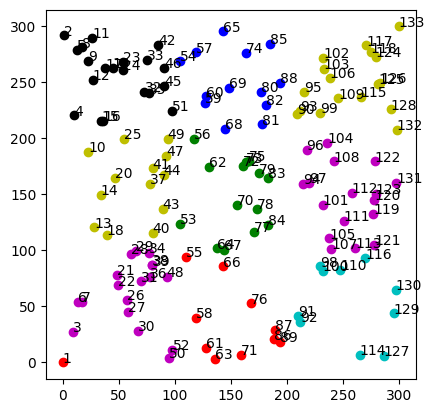

[227 186 214 218 186 184 194 190 200 190 184 209 183 211 204 216 182 184
 189 212 198 199 200 202 198 192 199 175 206 179 216 197 189 194 208 205
 180 175 194 208 224 210 217 204 185 171 197 196 196 206 190 188 180 176
 206 185 199 203 198 201 209 206 203 198 204 198 179 208 187 221 220 212
 195 217 194 194 199 197 208 203 191 229 213 187 203 186 204 207 166 170
 205 209 184 199 209 205 206 229 211 194]
[227 186 214 218 186 184 194 190 200 190 184 209 183 211 204 216 182 184
 189 212 198 199 200 202 198 192 199 175 206 179 216 197 189 194 208 205
 180 175 194 208 224 210 217 204 185 171 197 196 196 206 190 188 180 176
 206 185 199 203 198 201 209 206 203 198 204 198 179 208 187 221 220 212
 195 217 194 194 199 197 208 203 191 229 213 187 203 186 204 207 166 170
 205 209 184 199 209 205 206 229 211 194]

Total Expected Value:   200


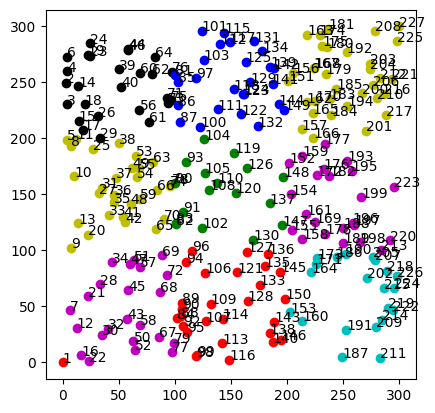

[228 271 266 245 239 231 246 239 252 253 247 272 218 267 264 287 203 226
 227 234 268 250 253 257 258 252 268 264 240 273 249 229 257 233 245 239
 293 252 271 268 232 253 265 261 246 243 230 255 262 248 248 232 263 224
 245 278 250 231 244 231 226 262 261 235 251 221 237 254 272 256 265 238
 232 227 240 226 244 221 240 249 251 265 278 227 258 256 244 262 262 247
 256 261 249 243 240 244 239 245 222 245]
[228 271 266 245 239 231 246 239 252 253 247 272 218 267 264 287 203 226
 227 234 268 250 253 257 258 252 268 264 240 273 249 229 257 233 245 239
 293 252 271 268 232 253 265 261 246 243 230 255 262 248 248 232 263 224
 245 278 250 231 244 231 226 262 261 235 251 221 237 254 272 256 265 238
 232 227 240 226 244 221 240 249 251 265 278 227 258 256 244 262 262 247
 256 261 249 243 240 244 239 245 222 245]

Total Expected Value:   250


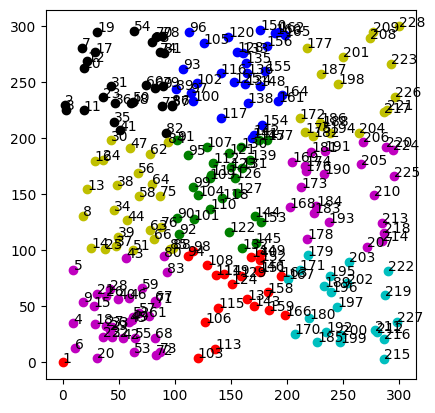

[319 257 284 299 296 292 301 304 276 319 305 306 270 316 305 281 319 264
 304 296 310 323 295 334 306 339 317 269 281 305 291 282 291 307 296 277
 307 289 334 285 290 286 320 293 309 263 305 313 291 281 296 318 292 291
 307 293 309 273 282 282 293 316 291 291 294 311 278 306 312 321 303 325
 291 289 312 317 274 298 299 279 289 292 296 316 314 296 285 309 293 304
 313 303 323 305 324 279 317 311 304 275]
[319 257 284 299 296 292 301 304 276 319 305 306 270 316 305 281 319 264
 304 296 310 323 295 334 306 339 317 269 281 305 291 282 291 307 296 277
 307 289 334 285 290 286 320 293 309 263 305 313 291 281 296 318 292 291
 307 293 309 273 282 282 293 316 291 291 294 311 278 306 312 321 303 325
 291 289 312 317 274 298 299 279 289 292 296 316 314 296 285 309 293 304
 313 303 323 305 324 279 317 311 304 275]

Total Expected Value:   300


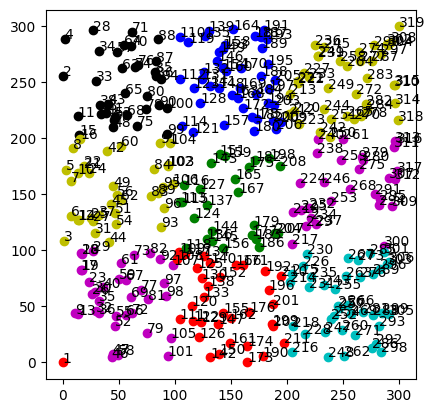

[368 343 358 363 310 341 364 383 340 339 322 347 321 327 368 355 320 347
 342 339 340 351 348 343 333 360 338 321 375 390 378 341 353 335 370 375
 367 354 339 376 348 361 351 362 345 356 353 347 347 336 334 332 345 373
 343 387 350 348 359 385 367 360 335 329 366 346 345 341 359 330 340 339
 351 378 381 387 359 347 375 340 344 364 314 363 358 337 351 331 352 364
 337 329 363 341 348 379 361 369 383 352]
[368 343 358 363 310 341 364 383 340 339 322 347 321 327 368 355 320 347
 342 339 340 351 348 343 333 360 338 321 375 390 378 341 353 335 370 375
 367 354 339 376 348 361 351 362 345 356 353 347 347 336 334 332 345 373
 343 387 350 348 359 385 367 360 335 329 366 346 345 341 359 330 340 339
 351 378 381 387 359 347 375 340 344 364 314 363 358 337 351 331 352 364
 337 329 363 341 348 379 361 369 383 352]

Total Expected Value:   350


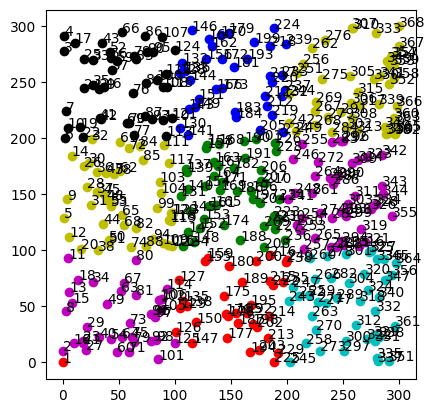

[388 390 405 403 396 406 413 408 417 371 394 383 441 388 455 420 386 373
 371 392 377 390 431 388 408 388 429 402 397 394 371 405 428 439 399 406
 389 429 394 376 432 393 375 387 429 412 402 412 414 418 409 410 396 420
 402 408 407 439 435 371 395 356 442 443 423 446 394 395 383 378 421 376
 424 393 363 402 405 407 375 416 383 376 402 400 407 419 410 422 405 394
 403 377 400 408 385 402 387 381 408 397]
[388 390 405 403 396 406 413 408 417 371 394 383 441 388 455 420 386 373
 371 392 377 390 431 388 408 388 429 402 397 394 371 405 428 439 399 406
 389 429 394 376 432 393 375 387 429 412 402 412 414 418 409 410 396 420
 402 408 407 439 435 371 395 356 442 443 423 446 394 395 383 378 421 376
 424 393 363 402 405 407 375 416 383 376 402 400 407 419 410 422 405 394
 403 377 400 408 385 402 387 381 408 397]

Total Expected Value:   400


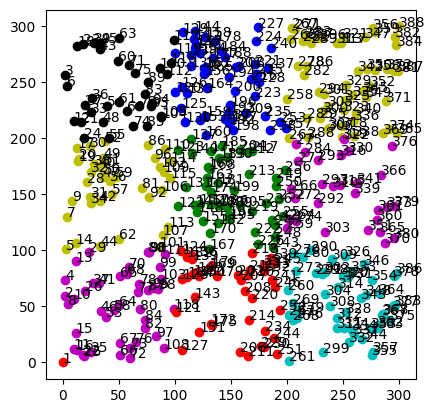

[432 473 461 445 451 460 463 453 441 458 442 502 466 435 407 473 440 465
 449 445 426 460 441 462 404 487 452 469 434 432 434 471 480 426 450 473
 457 477 448 463 460 433 473 502 430 408 435 443 427 469 471 473 434 440
 442 475 504 482 437 426 457 433 422 461 447 480 432 451 478 459 441 482
 454 448 440 463 448 439 474 436 441 483 471 473 453 409 465 449 457 472
 439 426 445 452 432 415 455 450 429 463]
[432 473 461 445 451 460 463 453 441 458 442 502 466 435 407 473 440 465
 449 445 426 460 441 462 404 487 452 469 434 432 434 471 480 426 450 473
 457 477 448 463 460 433 473 502 430 408 435 443 427 469 471 473 434 440
 442 475 504 482 437 426 457 433 422 461 447 480 432 451 478 459 441 482
 454 448 440 463 448 439 474 436 441 483 471 473 453 409 465 449 457 472
 439 426 445 452 432 415 455 450 429 463]

Total Expected Value:   450


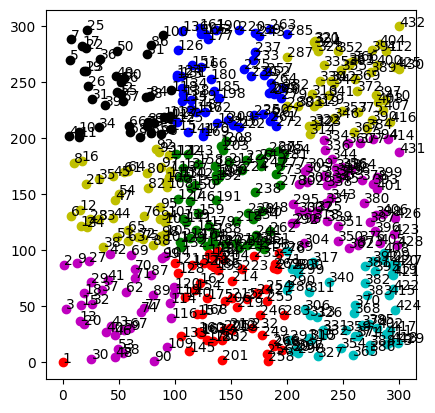

[487 503 519 493 522 488 457 460 508 507 502 450 514 500 508 527 475 492
 488 518 515 482 508 502 534 539 493 496 498 497 518 511 527 495 538 518
 458 524 491 517 491 526 516 522 516 511 522 499 487 488 483 510 551 506
 518 538 457 498 490 536 503 497 517 514 484 523 505 487 484 500 523 521
 551 492 477 494 524 490 497 488 472 514 556 485 526 477 479 492 510 514
 511 506 499 514 464 472 452 453 525 469]
[487 503 519 493 522 488 457 460 508 507 502 450 514 500 508 527 475 492
 488 518 515 482 508 502 534 539 493 496 498 497 518 511 527 495 538 518
 458 524 491 517 491 526 516 522 516 511 522 499 487 488 483 510 551 506
 518 538 457 498 490 536 503 497 517 514 484 523 505 487 484 500 523 521
 551 492 477 494 524 490 497 488 472 514 556 485 526 477 479 492 510 514
 511 506 499 514 464 472 452 453 525 469]

Total Expected Value:   500


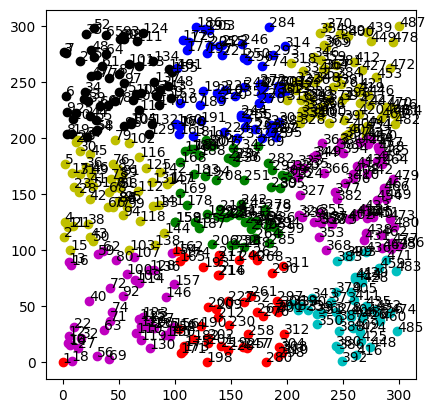

[20. 18. 23. 17. 19. 19. 19. 19. 18. 22. 18. 17. 14. 14. 17. 23. 19. 18.
 17. 17. 15. 17. 20. 18. 15. 15. 16. 15. 19. 14. 17. 16. 17. 18. 17. 20.
 19. 16. 18. 16. 19. 19. 14. 18. 19. 17. 17. 17. 19. 18. 17. 15. 22. 18.
 20. 16. 19. 18. 20. 17. 18. 17. 16. 17. 23. 16. 20. 18. 14. 15. 17. 18.
 19. 18. 17. 19. 18. 20. 16. 14. 17. 17. 14. 17. 17. 19. 18. 18. 16. 15.
 18. 17. 16. 15. 14. 15. 20. 19. 16. 15.]
17.48
1748.0
[11.99 17.48 21.66 25.39 28.56 31.27 34.08 36.97 39.17 40.58] [12.04140874 17.50180065 21.73018537 25.3133948  28.48145722 31.35320091
 33.99958076 36.4670126  38.78784118 40.98568019]
chistat 0.016051125418886723
Time:  2113.0464628080003


<ipython-input-3-b8834f12239f>:141: RuntimeWarning: divide by zero encountered in power
  f=2- 0.79*x**(-0.25)
<ipython-input-3-b8834f12239f>:142: RuntimeWarning: invalid value encountered in multiply
  y=np.sqrt(x)*f
<ipython-input-3-b8834f12239f>:145: RuntimeWarning: divide by zero encountered in power
  fnew=2-0.79*running_ExpVal**(-0.25)
<ipython-input-3-b8834f12239f>:147: RuntimeWarning: invalid value encountered in multiply
  yexp=yexp*fnew
<ipython-input-3-b8834f12239f>:165: RuntimeWarning: divide by zero encountered in power
  analytical_val[i]=(2- 0.79*x**(-0.25))*np.sqrt(x)
<ipython-input-3-b8834f12239f>:165: RuntimeWarning: invalid value encountered in double_scalars
  analytical_val[i]=(2- 0.79*x**(-0.25))*np.sqrt(x)


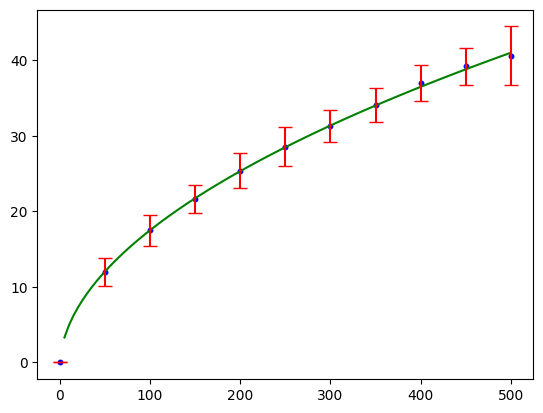

In [ ]:
#Longest Path length Distribution
#Endpoints: INCLUDED
#X-axis: ExpVal | Y-axis: avg ProperTime(Longest Path Length) over NoS number of sprinklings
import math
import numpy as np
import matplotlib.pyplot as plt
from array import array
from numpy.random import default_rng
import timeit
import csv
import pandas as pd
from array import array
start = timeit.default_timer()

#Variables
start_ExpVal=0
end_ExpVal=500
EV_step=50
NoS=100
a = 100 # upper bound
b = 0 # lower bound
extray=[0,0,0,100,100,100,200,200,200]
extrax=[0,100,200,0,100,200,0,100,200]
colorMap=['yo','mo','co','bo','go','ro','ko']
cycles=np.floor((end_ExpVal-start_ExpVal)/EV_step+1).astype(int)
running_ExpVal=np.zeros(cycles)
fcoordy=[[0 for x in range(end_ExpVal)] for y in range(9)]
fcoordx=[[0 for x in range(end_ExpVal)] for y in range(9)]
subN=[[0 for x in range(NoS)] for y in range(9)]
for i in range(cycles):
  running_ExpVal[i]=start_ExpVal+i*EV_step
running_ExpVal=running_ExpVal.astype(int)
memory=np.zeros(shape=(cycles,NoS))
average=np.zeros(cycles)
n_2d=np.zeros(shape=(cycles, NoS))
def longest_path_matrix(R, dmax=None):
    N = n[f]
    if dmax is None:
        dmax = N
    LP = np.zeros((N, N))
    i = 1
    B = R
    while np.sum(B) > 0.:
        path_exist = np.sign(B)
        path_length = i * path_exist
        LP = np.maximum.reduce((LP, path_length))
        B = np.dot(B, R)
        i += 1
        if i == dmax:
            return LP
    return LP

def subinterval_sprinkling(graph_points): # function which returns a set of sprinkled points with edge-points eliminated
  for i in range(9):
    #b=LOWER BOUND a=UPPER BOUND
    fcoordy[i]= (extray[i] + (b-a)* np.random.random_sample((subN[i][f],))+a)
    fcoordx[i]= (extrax[i] + (b-a)* np.random.random_sample((subN[i][f],))+a)

  coordx=[elem for row in fcoordx for elem in row]
  coordy=[elem for row in fcoordy for elem in row]
  if(n[f]):
    rand1=np.random.randint(0, n[f])
    rand2=np.random.randint(0, n[f])
    coordx[rand1]=b
    coordy[rand1]=b
    coordx[rand2]=a+extrax[8]
    coordy[rand2]=a+extray[8]
  #if(sno== 0 and rep== 0 and graph_points!=0):
    #print(fcoordx)
    #print(coordx)
  if(f== 0 and graph_points!=0):
    print(n)
    print("\nTotal Expected Value:  ", running_ExpVal[cy])
  index = np.argsort(coordx) # declare index array
  if(f==0 and graph_points!=0):   # plotting colored causal diamond for visualizing the Edge Bias Compensation (BLUE - Valid points)
   # print("\nRatata")
   # print(index)
    for i in range(n[f]):
      plt.plot(coordx[index[i]],coordy[index[i]], colorMap[(int(np.floor((300-coordx[index[i]])/100)*3+np.floor((300-coordy[index[i]])/100))%7)])
      plt.text(coordx[index[i]],coordy[index[i]], i+1)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()
  return coordx, coordy, index   # returns x and y coordinates of all valid points & index array & new count

for cy in range(cycles):
  avg=0
  subExpVal=running_ExpVal[cy]/9
  for i in range(9):
    rng = np.random.default_rng()
    subN[i]=rng.poisson(subExpVal, NoS)
  sum=np.sum(subN, axis=0)
  n=sum
  rng = np.random.default_rng()
  n_2d[cy] = n
  print(n)
  for f in range(NoS):
    coordx, coordy, index= subinterval_sprinkling(1)   # call Edge Bias Compensation function, save data
    R = [[0 for x in range(n[f])] for y in range(n[f])]
    L = [[0 for x in range(n[f])] for y in range(n[f])]

  #    print(index)

      # Calculate Relation Matrix
    for i in range(n[f]):
      for j in range (n[f]):
        R[i][j]=0
        if (coordx[index[i]] > coordx[index[j]] and coordy[index[i]] > coordy[index[j]]):
          R[i][j]=1

    # Calculate Link Matrix
    for i in range(n[f]):
      for j in range (n[f]):
        L[i][j]=0
        if(R[i][j]==0):
          L[i][j]==0
        elif(i>j):
          L[i][j]=1
          for point in range (min(i,j)+1, max(i,j)):
            if(R[i][point]==1 and R[point][j]==1):
              L[i][j]=0

      #Calculate avg and proper time longest path length
    _LP=longest_path_matrix(R, dmax=None)
    _LP_int=_LP.astype(int)
    proper_time=0
    for i in range(n[f]):
      for j in range(n[f]):
        if(_LP_int[i][j] > proper_time):
          proper_time=_LP_int[i][j]
    memory[cy][f] = proper_time
  average[cy]=np.sum(memory[cy])/NoS

print(memory[2])
print(average[2])
print(np.sum(memory[2]))

stnd_dev=np.std(memory, axis=1)
variance=np.var(memory, axis=1)

x=np.linspace(start_ExpVal, end_ExpVal, 100)
f=2- 0.79*x**(-0.25)
y=np.sqrt(x)*f
running_ExpVal=np.array(running_ExpVal)
# print(running_ExpVal)
fnew=2-0.79*running_ExpVal**(-0.25)
yexp=np.sqrt(running_ExpVal)
yexp=yexp*fnew
yexp=np.delete(yexp,0)
averagenew=np.delete(average,0)
print(averagenew,yexp)
# chistat=stats.chisquare(averagenew,yexp)
chistat=[]
for i in range(len(averagenew)):
  chistat=np.append(chistat,(((averagenew[i]-yexp[i])**2)/yexp[i]))
chistat=np.sum(chistat)
print("chistat", chistat) #chisquare value comparing values to analytical expression

#np.sqrt(x/5000)
#y=np.sqrt(np.pi)/(2*gamma(1/2))*x**2
plt.plot(x,y, 'g')

analytical_val=np.zeros(cycles)
for i in range(cycles):
  x=running_ExpVal[i]
  analytical_val[i]=(2- 0.79*x**(-0.25))*np.sqrt(x)
for i in range(cycles):
  x=running_ExpVal[i]
  #if(sd_memory[3][i] !=0):
  plt.scatter(running_ExpVal[i], average[i], linewidths=2, c='b', s=5)
  plt.errorbar(running_ExpVal[i], average[i], yerr=stnd_dev[i], fmt=' ', ecolor='r', capsize=5)
  list0 =["chistat=%.4f"%(chistat)," "]
  for q in range(np.max(n)):
    list0.append(q)
  list1 = ["Information:", "Expected Value"]
  list1.extend(running_ExpVal)
  list2=["Final ExpVal= %d" %(end_ExpVal),"Longest Path Length"]
  list2.extend(average)
  list3=["NoS= %d" %(NoS), "Standard_Dev"]
  list3.extend(stnd_dev)
  list4=["Endpoints Included", "Variance"]
  list4.extend(variance)
  list5=["Initial ExpVal= %d" %(start_ExpVal), "Analytical Estimation"]
  list5.extend(analytical_val)
  rows = list(zip(list0, list1, list5, list2, list3, list4))

  wtr = csv.writer(open ('BOX_LPD_EP_included_%d_%d.csv'%(end_ExpVal, NoS), 'w'), delimiter=',', lineterminator='\n')

  for row in rows :
      wtr.writerow (row)
stop = timeit.default_timer()
print('Time: ', stop - start)

[107 128 105 106 105 115  96 104 121 100  92  95  89  83 109 111  97 102
  98  98  98 107  98  93 116 103 109 119  75  97  89  99  88 114  92 106
 105  94  87 118  91  93  98  93 106 115 118 111  89 106 105 107 100  98
  84  87  93 101 102 101  93 118 118 112  96 100 112  96  89  86  93 101
 104 107  92 101  86 119  87  99  98  94 106 100 100 107 128  99 102 106
 112 102  95 100  95 108 115  88  99 104 108  84  99 106  98 102  99 101
 103  94  87 112  94  96 122  93  78 111 101  93 102  84  92  93  99  90
 103 105  95  88 102 105 124  98 111 100  95  89  87  89 105 103 103 112
 102  95  95 101  94 105 106  94 115 103  92 111 100  64  87  95  90 100
  97  88 113 108 107  87  99  90  99 101 104 107  89 106  99  96 107 102
  82 107  94 101  99 102 108 112  86 106 103  93  95 100 110 116  98 103
 100  93 104 111  91 100 100 106  90  85  92 110 105  92  89  96 116  95
 107  85  95  92 102  92 107 110 114 111  86  84  93  99 100  88 102 103
  85  83 105 121  93 120 102  98 102  91 100 105 10

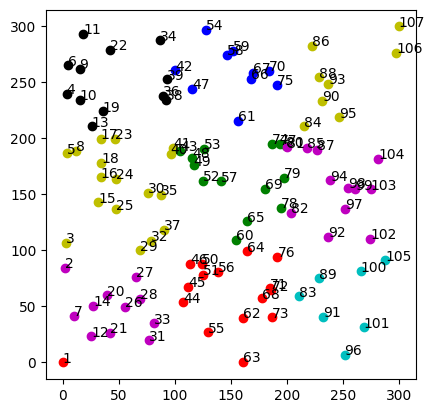

[[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 1, 0,

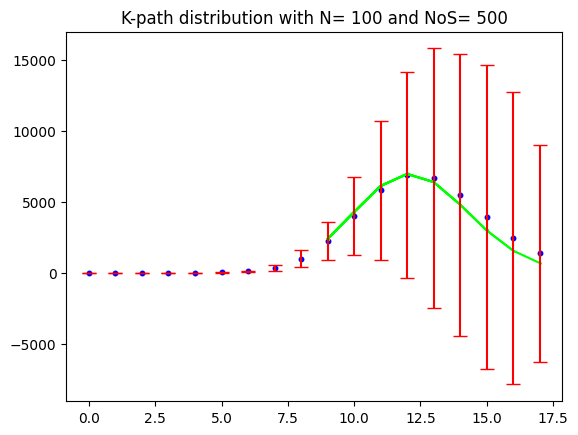

Time:  664.06564714


In [ ]:
#K-Path Distribution
#Endpoint: EXCLUDED
#X-axis: K-Path length | Y-axis: avg # of K_Paths over NoS nmuber of sprinklings
import math
import numpy as np
import matplotlib.pyplot as plt
from array import array
from numpy.random import default_rng
import timeit
import csv
import pandas as pd
from array import array
from scipy.special import gamma, factorial, comb
start = timeit.default_timer()

#Variables
N=100
d = 2  #number of dimensions
NoS=500
a = 50 # upper bound
b = 0 # lower bound
howfar2plot=18

ExpVal=N
rng = np.random.default_rng()
n= rng.poisson(ExpVal, NoS)
n+=2
counter=np.zeros(NoS)
average=np.zeros(ExpVal)
subN=[[0 for x in range(NoS)] for y in range(9)]
fcoordy=[[0 for x in range(ExpVal)] for y in range(9)]
fcoordx=[[0 for x in range(ExpVal)] for y in range(9)]
a = 100 # upper bound
b = 0 # lower bound
mem_num=0

subExpVal=ExpVal/9
extray=[0,0,0,100,100,100,200,200,200]
extrax=[0,100,200,0,100,200,0,100,200]
colorMap=['yo','mo','co','bo','go','ro','ko']
for i in range(9):
  rng = np.random.default_rng()
  subN[i]=rng.poisson(subExpVal, NoS)

sum=np.sum(subN, axis=0)
n=sum
memory=np.zeros(shape=(NoS,np.max(n)))
fcoordy=[[0 for x in range(np.max(n))] for y in range(9)]
fcoordx=[[0 for x in range(np.max(n))] for y in range(9)]

def count_paths(adj_matrix):
  N = len(adj_matrix)  # Number of nodes in the graph
  path_counts = [0] * (N + 1)  # Initialize an array to store path counts by length
  def dfs(node, length):
    if length > N:  # Ignore paths longer than the number of nodes
      return
    if length and node==N-1:
      path_counts[length] += 1  # Increment the count for the current length
    for neighbor in range(N):
      if adj_matrix[node][neighbor] == 1:
        dfs(neighbor, length + 1)  # Recursive DFS call with increased length
  # Start the DFS traversal from each node
  dfs(0, 0)
  return path_counts

def longest_path_matrix(R, dmax=None):
    N = n[f]
    if dmax is None:
        dmax = N
    LP = np.zeros((N, N))
    i = 1
    B = R
    while np.sum(B) > 0.:
        path_exist = np.sign(B)
        path_length = i * path_exist
        LP = np.maximum.reduce((LP, path_length))
        B = np.dot(B, R)
        i += 1
        if i == dmax:
            return LP
    return LP

def subinterval_sprinkling(graph_points): # function which returns a set of sprinkled points with edge-points eliminated
  for i in range(9):
    #b=LOWER BOUND a=UPPER BOUND
    fcoordy[i]= (extray[i] + (b-a)* np.random.random_sample((subN[i][f],))+a)
    fcoordx[i]= (extrax[i] + (b-a)* np.random.random_sample((subN[i][f],))+a)
  coordx=[elem for row in fcoordx for elem in row]
  coordy=[elem for row in fcoordy for elem in row]
  if(n[f]):
    rand1=np.random.randint(0, n[f])
    rand2=np.random.randint(0, n[f])
    coordx[rand1]=b
    coordy[rand1]=b
    coordx[rand2]=a+extrax[8]
    coordy[rand2]=a+extray[8]
  #if(sno== 0 and rep== 0 and graph_points!=0):
    #print(fcoordx)
    #print(coordx)
  if(sno==0 and graph_points!=0):
    print(n)
    print("\nTotal Expected Value:  ", ExpVal)
  index = np.argsort(coordx) # declare index array
  if(sno==0 and graph_points!=0):   # plotting colored causal diamond for visualizing the Edge Bias Compensation (BLUE - Valid points)
   # print("\nRatata")
   # print(index)
    for i in range(n[f]):
      plt.plot(coordx[index[i]],coordy[index[i]], colorMap[(int(np.floor((300-coordx[index[i]])/100)*3+np.floor((300-coordy[index[i]])/100))%7)])
      plt.text(coordx[index[i]],coordy[index[i]], i+1)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()
  return coordx, coordy, index   # returns x and y coordinates of all valid points & index array & new count

for f in range(NoS):
  sno=f  # sno = sprinkling number
  new_n=0
  save_n=n[f]  # used for saving, in memory, the initial value of n[f] generated by the Poisson distribution
  coordx, coordy, index= subinterval_sprinkling(1)   # call Edge Bias Compensation function, save data
  R = [[0 for x in range(n[f])] for y in range(n[f])]
  L = [[0 for x in range(n[f])] for y in range(n[f])]


    # Calculate Relation Matrix
  for i in range(n[f]):
    for j in range (n[f]):
      R[i][j]=0
      if (coordx[index[i]] < coordx[index[j]] and coordy[index[i]] < coordy[index[j]]):
        R[i][j]=1

  # Calculate Link Matrix
  for i in range(n[f]):
    for j in range (n[f]):
      L[i][j]=0
      if(R[i][j]==0):
        L[i][j]==0
      elif(i<j):
        L[i][j]=1
        for point in range (min(i,j)+1, max(i,j)):
          if(R[i][point]==1 and R[point][j]==1):
            L[i][j]=0
  path_counts=count_paths(L)
  if(f==0):
    print(L)
    print("path_counts")
    print(path_counts)
  for i in range(1, n[f]):
    memory[f][i]=path_counts[i]

total_number=np.sum(memory, axis=0)
print("Total number")
print(total_number)
for i in range(ExpVal):
  average[i]=total_number[i]/NoS
stnd_dev=np.std(memory, axis=0)
variance=np.var(memory, axis=0)
###########################################
# ANALYTICAL Expression
###########################################

#print(np.finfo(np.longdouble))
# Here kmax is the known maximum path length (using 25 just for illustration)
kmax = N+2

fik = np.zeros((N+1,N+3))  # initialize the array to zero
fik_num_part= np.zeros((N+1,N+3))
fik_exp_part= np.zeros((N+1,N+3))

def separate_float_into_number_and_power(number):
    # Get the exponent of the number using logarithm base 10
    exponent = int(math.floor(math.log10(abs(number))))

    # Calculate the number part
    number_part = number / (10 ** exponent)

    return number_part, exponent

def multiply_floats(num1, num2):
    # Separate the numbers into number_part and exponent
    number_part1, exponent1 = separate_float_into_number_and_power(num1)
    number_part2, exponent2 = separate_float_into_number_and_power(num2)

    # Multiply the number parts
    result_number_part = number_part1 * number_part2

    # Add the exponents
    result_exponent = exponent1 + exponent2

    # Combine them into the final result
    result = result_number_part * (10 ** result_exponent)

    return result

def divide_floats(num1, num2):
    # Separate the numbers into number_part and exponent
    number_part1, exponent1 = separate_float_into_number_and_power(num1)
    number_part2, exponent2 = separate_float_into_number_and_power(num2)

    # Multiply the number parts
    result_number_part = number_part1 / number_part2

    # Add the exponents
    result_exponent = exponent1 - exponent2

    # Combine them into the final result
    result = result_number_part * (10 ** result_exponent)

    return result
# set all the values for k=1 to start the recursion
for i in range (0,N+1):
   fik[i][1] = gamma(i+1)


# recursion to fill the rest of the array
for k in range (2,N+2):
  for i in range (0,N-k+2):
    for j in range (0,i+1):
      fik[i][k] = fik[i][k] + multiply_floats(gamma(1+(i-j)*d/2), fik[j][k-1])
     # old_settings = np.seterr(all='warn', over='raise')
    fik_exp_part[i][k]=1
    fik_num_part[i][k]=1


# Now to get the mean number of k-paths (NumK) given a value of k for dimension d
NumK =0
kval=np.zeros(N+2)
for k in range(1,N+2):
  NumK = 0
  for i in range (0,N-k+2):
    add=comb(N-k+1,i) * ((-1)**(i)) * multiply_floats(divide_floats(gamma(i+1) , gamma((i+k)*d/2)),fik[i][k])
    add=divide_floats(add, gamma(1+(k-1+i)*d/2))
    NumK = NumK + add
    # if k==1 :
    #   print(NumK)
  fact_div=1
  for i in range(N-k+2, N+1):
    fact_div=fact_div*i

  kval[k] = multiply_floats(NumK , fact_div)

plotted_x = []
plotted_y = []
for k in range(9, howfar2plot):
  if kval[k]>0 and kval[k]<10**4:
    plotted_x.append(k)
    plotted_y.append(kval[k])

# Plot the dots
  plt.plot(plotted_x, plotted_y, marker='o', linestyle='-', color='lime', markersize='1')
plt.title('K-path distribution with N= %d and NoS= %d'%(N, NoS))
print(kval)
plt.plot()
yexp = []
indexfordel= [0,1,2,3,4,5,6,7,8]
for k in range(9,25):
  if kval[k]>0 and kval[k]<10**4:
    yexp.append(kval[k])
  else:
    indexfordel.append(k)
print(yexp)

for i in range(25,len(average)):
  indexfordel.append(i)
averagenew=np.delete(average,indexfordel)
print("averagenew")
print(averagenew)
chistat=[]
for i in range(len(averagenew)):
  chistat=np.append(chistat,(((averagenew[i]-yexp[i])**2)/yexp[i]))
chistat=np.sum(chistat)
print("chistat", chistat) #chisquare value comparing values to analytical expression

stop = timeit.default_timer()
print('Time: ', stop - start)
###########################################
# DATA EXPORT
###########################################

for i in range(howfar2plot):
  #if(sd_memory[3][i] !=0):
  plt.scatter(i, average[i], linewidths=2, c='b', s=5)
  plt.errorbar(i, average[i], yerr=stnd_dev[i], fmt=' ', ecolor='r', capsize=5)
  list0 =["chistat=%.4f"%(chistat)," "]
  for q in range(np.max(n)):
    list0.append(q)
  list2=["ExpVal= %d" %(ExpVal),"K-path Distribution"]
  list2.extend(average)
  list3=["NoS= %d" %(NoS), "Standard_Dev"]
  list3.extend(stnd_dev)
  list4=["Endpoints Excluded", "Variance"]
  list4.extend(variance)
  list5=[" ", "Analytical Estimation"]
  list5.extend(kval)
  rows = list(zip(list0, list5, list2, list3, list4))

  wtr = csv.writer(open ('SBI_KPD_EP_excluded_%d_%d.csv'%(ExpVal, NoS), 'w'), delimiter=',', lineterminator='\n')

  for row in rows :
    wtr.writerow (row)
plt.show()

stop = timeit.default_timer()
print('Time: ', stop - start)

[ 99  92 100 102  97 115 106 111  80  98  99  92 117 121 106  97  86 100
  98 107  97  96  83 102  91  78 104 104 103  84  97 110 113  94  94  84
 121 101 104  90  92 103  98 101  96  86 116  89  97  85 118 102 108  80
 102 106  95  90  99 108  83 128  93  91 119  94 105  98  84  90 106  98
 112  90 108  98 104 103  90  98 109 109 101  66 117 100 105 100  96  97
 111 105  89 127  90  95  88 122  86  88  91  89  94  99  89  98  86 118
 104 113  89 100  83  96  93 117  93  95 111 100 121  86 107  92  99  95
  93  96 101 112 103 111  96 106 107  92  77 102 104 105  96  95 113 110
 113  95  93 107  95  87  98 125 111  87  88 109 101 103 116 102  99 100
 108  96 105 114  98  79 114  85  98 105 103 115 110 106 109  98 104 119
  86 113 109  92 104 103 113  68  85  97 107 103 103 121 110  83 101  88
  97  79 127  93 102 122 117 111  91 106 109  98 114 115 106 104  96 105
 104 110 106  91 108 111  94 108  92  91 109 102  94  90  99 111  93 107
  92 106 110  92 105 108  98 107  97  87 108  96 11

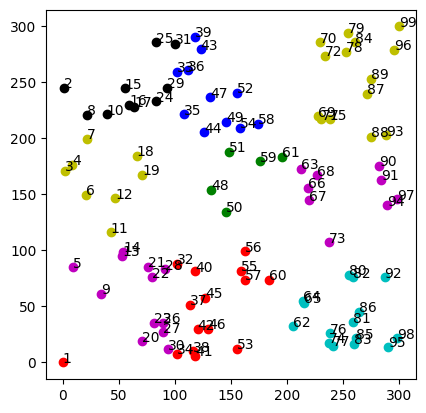

[[0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

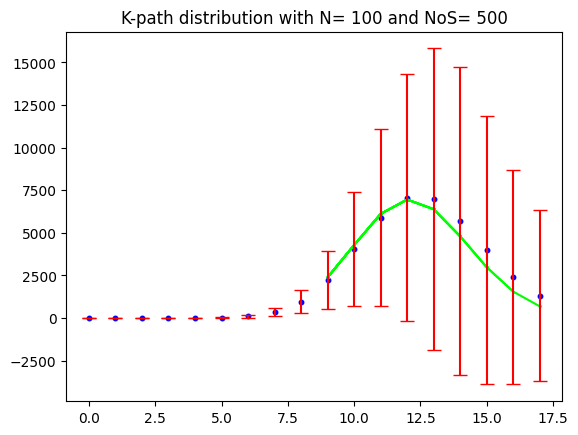

Time:  717.092644051


In [ ]:
#K-Path Distribution
#Endpoint: INCLUDED
#X-axis: K-Path length | Y-axis: avg # of K_Paths over NoS nmuber of sprinklings
import math
import numpy as np
import matplotlib.pyplot as plt
from array import array
from numpy.random import default_rng
import timeit
import csv
import pandas as pd
from array import array
from scipy.special import gamma, factorial, comb
start = timeit.default_timer()

#Variables
N=100
d = 2  #number of dimensions
NoS=500
a = 50 # upper bound
b = 0 # lower bound
howfar2plot=18

ExpVal=N
rng = np.random.default_rng()
n= rng.poisson(ExpVal, NoS)
counter=np.zeros(NoS)
average=np.zeros(ExpVal)
subN=[[0 for x in range(NoS)] for y in range(9)]
fcoordy=[[0 for x in range(ExpVal)] for y in range(9)]
fcoordx=[[0 for x in range(ExpVal)] for y in range(9)]
a = 100 # upper bound
b = 0 # lower bound
mem_num=0

subExpVal=ExpVal/9
extray=[0,0,0,100,100,100,200,200,200]
extrax=[0,100,200,0,100,200,0,100,200]
colorMap=['yo','mo','co','bo','go','ro','ko']
for i in range(9):
  rng = np.random.default_rng()
  subN[i]=rng.poisson(subExpVal, NoS)

sum=np.sum(subN, axis=0)
n=sum
memory=np.zeros(shape=(NoS,np.max(n)))
fcoordy=[[0 for x in range(np.max(n))] for y in range(9)]
fcoordx=[[0 for x in range(np.max(n))] for y in range(9)]

def count_paths(adj_matrix):
  N = len(adj_matrix)  # Number of nodes in the graph
  path_counts = [0] * (N + 1)  # Initialize an array to store path counts by length
  def dfs(node, length):
    if length > N:  # Ignore paths longer than the number of nodes
      return
    if length and node==N-1:
      path_counts[length] += 1  # Increment the count for the current length
    for neighbor in range(N):
      if adj_matrix[node][neighbor] == 1:
        dfs(neighbor, length + 1)  # Recursive DFS call with increased length
  # Start the DFS traversal from each node
  dfs(0, 0)
  return path_counts

def longest_path_matrix(R, dmax=None):
    N = n[f]
    if dmax is None:
        dmax = N
    LP = np.zeros((N, N))
    i = 1
    B = R
    while np.sum(B) > 0.:
        path_exist = np.sign(B)
        path_length = i * path_exist
        LP = np.maximum.reduce((LP, path_length))
        B = np.dot(B, R)
        i += 1
        if i == dmax:
            return LP
    return LP

def subinterval_sprinkling(graph_points): # function which returns a set of sprinkled points with edge-points eliminated
  for i in range(9):
    #b=LOWER BOUND a=UPPER BOUND
    fcoordy[i]= (extray[i] + (b-a)* np.random.random_sample((subN[i][f],))+a)
    fcoordx[i]= (extrax[i] + (b-a)* np.random.random_sample((subN[i][f],))+a)
  coordx=[elem for row in fcoordx for elem in row]
  coordy=[elem for row in fcoordy for elem in row]
  if(n[f]):
    rand1=np.random.randint(0, n[f])
    rand2=np.random.randint(0, n[f])
    coordx[rand1]=b
    coordy[rand1]=b
    coordx[rand2]=a+extrax[8]
    coordy[rand2]=a+extray[8]
  #if(sno== 0 and rep== 0 and graph_points!=0):
    #print(fcoordx)
    #print(coordx)
  if(sno==0 and graph_points!=0):
    print(n)
    print("\nTotal Expected Value:  ", ExpVal)
  index = np.argsort(coordx) # declare index array
  if(sno==0 and graph_points!=0):   # plotting colored causal diamond for visualizing the Edge Bias Compensation (BLUE - Valid points)
   # print("\nRatata")
   # print(index)
    for i in range(n[f]):
      plt.plot(coordx[index[i]],coordy[index[i]], colorMap[(int(np.floor((300-coordx[index[i]])/100)*3+np.floor((300-coordy[index[i]])/100))%7)])
      plt.text(coordx[index[i]],coordy[index[i]], i+1)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()
  return coordx, coordy, index   # returns x and y coordinates of all valid points & index array & new count

for f in range(NoS):
  sno=f  # sno = sprinkling number
  new_n=0
  save_n=n[f]  # used for saving, in memory, the initial value of n[f] generated by the Poisson distribution
  coordx, coordy, index= subinterval_sprinkling(1)   # call Edge Bias Compensation function, save data
  R = [[0 for x in range(n[f])] for y in range(n[f])]
  L = [[0 for x in range(n[f])] for y in range(n[f])]


    # Calculate Relation Matrix
  for i in range(n[f]):
    for j in range (n[f]):
      R[i][j]=0
      if (coordx[index[i]] < coordx[index[j]] and coordy[index[i]] < coordy[index[j]]):
        R[i][j]=1

  # Calculate Link Matrix
  for i in range(n[f]):
    for j in range (n[f]):
      L[i][j]=0
      if(R[i][j]==0):
        L[i][j]==0
      elif(i<j):
        L[i][j]=1
        for point in range (min(i,j)+1, max(i,j)):
          if(R[i][point]==1 and R[point][j]==1):
            L[i][j]=0
  path_counts=count_paths(L)
  if(f==0):
    print(L)
    print("path_counts")
    print(path_counts)
  for i in range(1, n[f]):
    memory[f][i]=path_counts[i]

total_number=np.sum(memory, axis=0)
print("Total number")
print(total_number)
for i in range(ExpVal):
  average[i]=total_number[i]/NoS
stnd_dev=np.std(memory, axis=0)
variance=np.var(memory, axis=0)
###########################################
# ANALYTICAL Expression
###########################################

#print(np.finfo(np.longdouble))
# Here kmax is the known maximum path length (using 25 just for illustration)
kmax = N+2

fik = np.zeros((N+1,N+3))  # initialize the array to zero
fik_num_part= np.zeros((N+1,N+3))
fik_exp_part= np.zeros((N+1,N+3))

def separate_float_into_number_and_power(number):
    # Get the exponent of the number using logarithm base 10
    exponent = int(math.floor(math.log10(abs(number))))

    # Calculate the number part
    number_part = number / (10 ** exponent)

    return number_part, exponent

def multiply_floats(num1, num2):
    # Separate the numbers into number_part and exponent
    number_part1, exponent1 = separate_float_into_number_and_power(num1)
    number_part2, exponent2 = separate_float_into_number_and_power(num2)

    # Multiply the number parts
    result_number_part = number_part1 * number_part2

    # Add the exponents
    result_exponent = exponent1 + exponent2

    # Combine them into the final result
    result = result_number_part * (10 ** result_exponent)

    return result

def divide_floats(num1, num2):
    # Separate the numbers into number_part and exponent
    number_part1, exponent1 = separate_float_into_number_and_power(num1)
    number_part2, exponent2 = separate_float_into_number_and_power(num2)

    # Multiply the number parts
    result_number_part = number_part1 / number_part2

    # Add the exponents
    result_exponent = exponent1 - exponent2

    # Combine them into the final result
    result = result_number_part * (10 ** result_exponent)

    return result
# set all the values for k=1 to start the recursion
for i in range (0,N+1):
   fik[i][1] = gamma(i+1)


# recursion to fill the rest of the array
for k in range (2,N+2):
  for i in range (0,N-k+2):
    for j in range (0,i+1):
      fik[i][k] = fik[i][k] + multiply_floats(gamma(1+(i-j)*d/2), fik[j][k-1])
     # old_settings = np.seterr(all='warn', over='raise')
    fik_exp_part[i][k]=1
    fik_num_part[i][k]=1


# Now to get the mean number of k-paths (NumK) given a value of k for dimension d
NumK =0
kval=np.zeros(N+2)
for k in range(1,N+2):
  NumK = 0
  for i in range (0,N-k+2):
    add=comb(N-k+1,i) * ((-1)**(i)) * multiply_floats(divide_floats(gamma(i+1) , gamma((i+k)*d/2)),fik[i][k])
    add=divide_floats(add, gamma(1+(k-1+i)*d/2))
    NumK = NumK + add
    # if k==1 :
    #   print(NumK)
  fact_div=1
  for i in range(N-k+2, N+1):
    fact_div=fact_div*i

  kval[k] = multiply_floats(NumK , fact_div)

plotted_x = []
plotted_y = []
for k in range(9,howfar2plot):
  if kval[k]>0 and kval[k]<10**4:
    plotted_x.append(k)
    plotted_y.append(kval[k])

# Plot the dots
  plt.plot(plotted_x, plotted_y, marker='o', linestyle='-', color='lime', markersize='1')
plt.title('K-path distribution with N= %d and NoS= %d'%(N, NoS))
print(kval)
plt.plot()
yexp = []
indexfordel= [0,1,2,3,4,5,6,7,8]
for k in range(9,25):
  if kval[k]>0 and kval[k]<10**4:
    yexp.append(kval[k])
  else:
    indexfordel.append(k)
print(yexp)

for i in range(25,len(average)):
  indexfordel.append(i)
averagenew=np.delete(average,indexfordel)
print("averagenew")
print(averagenew)
chistat=[]
for i in range(len(averagenew)):
  chistat=np.append(chistat,(((averagenew[i]-yexp[i])**2)/yexp[i]))
chistat=np.sum(chistat)
print("chistat", chistat) #chisquare value comparing values to analytical expression


stop = timeit.default_timer()
print('Time: ', stop - start)
###########################################
# DATA EXPORT
###########################################

for i in range(howfar2plot):
  #if(sd_memory[3][i] !=0):
  plt.scatter(i, average[i], linewidths=2, c='b', s=5)
  plt.errorbar(i, average[i], yerr=stnd_dev[i], fmt=' ', ecolor='r', capsize=5)
  list0 =["chistat=%.4f"%(chistat)," "]
  for q in range(np.max(n)):
    list0.append(q)
  list2=["ExpVal= %d" %(ExpVal),"K-path Distribution"]
  list2.extend(average)
  list3=["NoS= %d" %(NoS), "Standard_Dev"]
  list3.extend(stnd_dev)
  list4=["Endpoints Included", "Variance"]
  list4.extend(variance)
  list5=[" ", "Analytical Estimation"]
  list5.extend(kval)
  rows = list(zip(list0, list5, list2, list3, list4))

  wtr = csv.writer(open ('SBI_KPD_EP_included_%d_%d.csv'%(ExpVal, NoS), 'w'), delimiter=',', lineterminator='\n')

  for row in rows :
    wtr.writerow (row)
plt.show()

stop = timeit.default_timer()
print('Time: ', stop - start)

[101 100  77 103  95 104 100 105  96  99 119  97  96 107  91 113 102 105
 116  94 100  90  87  99 100  98 109  89 113  96 103  95  87  82 101 114
 110 131 107  95  95  97 116  93 104 109 109 117 106  91  84  99 108  95
 106 100  99  98 105  98  94 102  93  83  92  93  99 114  98 100  91  93
 105  88 102  99  78 111 101 102 102 107 113  85  98 106  99  92 114 111
 112  84 112  99  93 103 102  85  89 105 107 101  93  94 111  97  92  93
  91 114 100 114 102 101 102  83 101 110 109 122  97  87  86  98 125 111
  99 101 115  85 113  93  80  95 107  99 108 103  96 108  97  99  88  93
  75  92  89 101  98  91 106  92 101  99 101  86  84 119  89 100  92  92
  93 108  78  90 112 109 103 120 102  85  90 114  99 106  96  99  83 104
 107  72  90  84  83  96  95 106  95  90 116  88  90  80  93  87 101  92
  98 100 105  99 102  90 105 111 100  85  91 103 104 107  86 125 103  86
  91  93 119 109  95  97 115  96 100 101  92  84  90 104 128 106 102 105
 103 106 111 112 115 109  88  96 127  97  98 102 10

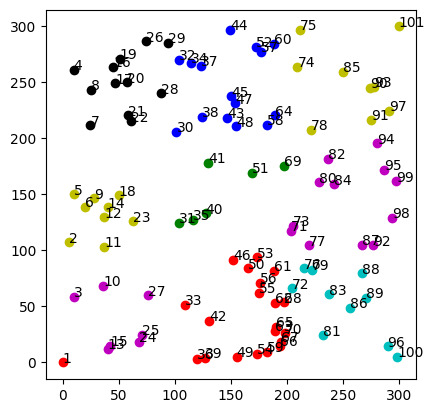

[[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

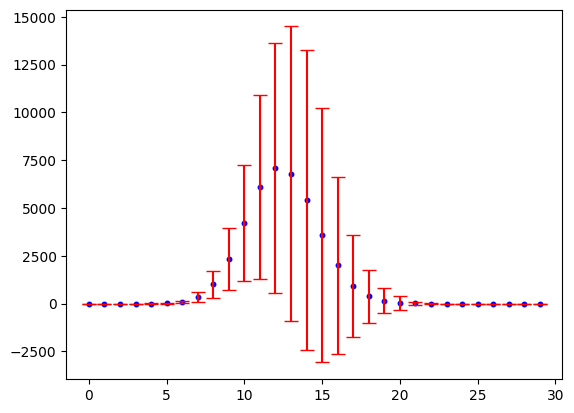

Time:  319.3109088910005


In [ ]:
#K-Path Distribution WITHOUT ANALYTICAL EXPRESSION
#Endpoint: INCLUDED
#X-axis: K-Path length | Y-axis: avg # of K_Paths over NoS nmuber of sprinklings
import math
import numpy as np
import matplotlib.pyplot as plt
from array import array
from numpy.random import default_rng
import timeit
import csv
import pandas as pd
from array import array
from scipy.special import gamma, factorial, comb
start = timeit.default_timer()

#Variables
N=100
d = 2  #number of dimensions
NoS=500
a = 100 # upper bound
b = 0 # lower bound
howfar2plot=30

ExpVal=N
rng = np.random.default_rng()
n= rng.poisson(ExpVal, NoS)
counter=np.zeros(NoS)
subN=[[0 for x in range(NoS)] for y in range(9)]
fcoordy=[[0 for x in range(ExpVal)] for y in range(9)]
fcoordx=[[0 for x in range(ExpVal)] for y in range(9)]
a = 100 # upper bound
b = 0 # lower bound
mem_num=0

subExpVal=ExpVal/9
extray=[0,0,0,100,100,100,200,200,200]
extrax=[0,100,200,0,100,200,0,100,200]
colorMap=['yo','mo','co','bo','go','ro','ko']
for i in range(9):
  rng = np.random.default_rng()
  subN[i]=rng.poisson(subExpVal, NoS)

sum=np.sum(subN, axis=0)
n=sum
memory=np.zeros(shape=(NoS,np.max(n)))
average=np.zeros(max(n))
fcoordy=[[0 for x in range(np.max(n))] for y in range(9)]
fcoordx=[[0 for x in range(np.max(n))] for y in range(9)]

def count_paths(adj_matrix):
  N = len(adj_matrix)  # Number of nodes in the graph
  path_counts = [0] * (N + 1)  # Initialize an array to store path counts by length
  def dfs(node, length):
    if length > N:  # Ignore paths longer than the number of nodes
      return
    if length and node==N-1:
      path_counts[length] += 1  # Increment the count for the current length
    for neighbor in range(N):
      if adj_matrix[node][neighbor] == 1:
        dfs(neighbor, length + 1)  # Recursive DFS call with increased length
  # Start the DFS traversal from each node
  dfs(0, 0)
  return path_counts

def longest_path_matrix(R, dmax=None):
    N = n[f]
    if dmax is None:
        dmax = N
    LP = np.zeros((N, N))
    i = 1
    B = R
    while np.sum(B) > 0.:
        path_exist = np.sign(B)
        path_length = i * path_exist
        LP = np.maximum.reduce((LP, path_length))
        B = np.dot(B, R)
        i += 1
        if i == dmax:
            return LP
    return LP

def subinterval_sprinkling(graph_points): # function which returns a set of sprinkled points with edge-points eliminated
  for i in range(9):
    #b=LOWER BOUND a=UPPER BOUND
    fcoordy[i]= (extray[i] + (b-a)* np.random.random_sample((subN[i][f],))+a)
    fcoordx[i]= (extrax[i] + (b-a)* np.random.random_sample((subN[i][f],))+a)
  coordx=[elem for row in fcoordx for elem in row]
  coordy=[elem for row in fcoordy for elem in row]
  if(n[f]):
    rand1=np.random.randint(0, n[f])
    rand2=np.random.randint(0, n[f])
    coordx[rand1]=b
    coordy[rand1]=b
    coordx[rand2]=a+extrax[8]
    coordy[rand2]=a+extray[8]
  #if(sno== 0 and rep== 0 and graph_points!=0):
    #print(fcoordx)
    #print(coordx)
  if(sno==0 and graph_points!=0):
    print(n)
    print("\nTotal Expected Value:  ", ExpVal)
  index = np.argsort(coordx) # declare index array
  if(sno==0 and graph_points!=0):   # plotting colored causal diamond for visualizing the Edge Bias Compensation (BLUE - Valid points)
   # print("\nRatata")
   # print(index)
    for i in range(n[f]):
      plt.plot(coordx[index[i]],coordy[index[i]], colorMap[(int(np.floor((300-coordx[index[i]])/100)*3+np.floor((300-coordy[index[i]])/100))%7)])
      plt.text(coordx[index[i]],coordy[index[i]], i+1)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()
  return coordx, coordy, index   # returns x and y coordinates of all valid points & index array & new count

for f in range(NoS):
  sno=f  # sno = sprinkling number
  new_n=0
  save_n=n[f]  # used for saving, in memory, the initial value of n[f] generated by the Poisson distribution
  coordx, coordy, index= subinterval_sprinkling(1)   # call Edge Bias Compensation function, save data
  R = [[0 for x in range(n[f])] for y in range(n[f])]
  L = [[0 for x in range(n[f])] for y in range(n[f])]


    # Calculate Relation Matrix
  for i in range(n[f]):
    for j in range (n[f]):
      R[i][j]=0
      if (coordx[index[i]] < coordx[index[j]] and coordy[index[i]] < coordy[index[j]]):
        R[i][j]=1

  # Calculate Link Matrix
  for i in range(n[f]):
    for j in range (n[f]):
      L[i][j]=0
      if(R[i][j]==0):
        L[i][j]==0
      elif(i<j):
        L[i][j]=1
        for point in range (min(i,j)+1, max(i,j)):
          if(R[i][point]==1 and R[point][j]==1):
            L[i][j]=0
  path_counts=count_paths(L)
  if(f==0):
    print(L)
    print("path_counts")
    print(path_counts)
  for i in range(1, n[f]):
    memory[f][i]=path_counts[i]

total_number=np.sum(memory, axis=0)
print("Total number")
print(total_number)
for i in range(max(n)):
  average[i]=total_number[i]/NoS
stnd_dev=np.std(memory, axis=0)
variance=np.var(memory, axis=0)

###########################################
# DATA EXPORT
###########################################

for i in range(howfar2plot):
  #if(sd_memory[3][i] !=0):
  plt.scatter(i, average[i], linewidths=2, c='b', s=5)
  plt.errorbar(i, average[i], yerr=stnd_dev[i], fmt=' ', ecolor='r', capsize=5)
  list0 =[" "," "]
  for q in range(np.max(n)):
    list0.append(q)
  list2=["ExpVal= %d" %(ExpVal),"K-path Distribution"]
  list2.extend(average)
  list3=["NoS= %d" %(NoS), "Standard_Dev"]
  list3.extend(stnd_dev)
  list4=["Endpoints Included", "Variance"]
  list4.extend(variance)
  rows = list(zip(list0, list2, list3, list4))

  wtr = csv.writer(open ('SBI_KPD_EP_included_NO_ANALYTICAL_%d_%d.csv'%(ExpVal, NoS), 'w'), delimiter=',', lineterminator='\n')

  for row in rows :
    wtr.writerow (row)
plt.show()

stop = timeit.default_timer()
print('Time: ', stop - start)